In [1]:
import json
import cpi
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor, to_graphviz,plot_importance
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
happy_path = "C:/Users/JanetGitonga/Desktop/Data Science Project/2017.csv"

In [3]:
happy_df = pd.read_csv(happy_path)
happy_df.head(10)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   
5  Netherlands               6            7.377      7.427426     7.326574   
6       Canada               7            7.316      7.384403     7.247597   
7  New Zealand               8            7.314      7.379510     7.248490   
8       Sweden               9            7.284      7.344095     7.223905   
9    Australia              10            7.284      7.356651     7.211349   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   
5                  1.503945  1.428939                  0.810696  0.585384   
6                  1.479204  1.481349                  0.834558  0.611101   
7                  1.405706  1.548195                  0.816760  0.614062   
8                  1.494387  1.478162                  0.830875  0.612924   
9                  1.484415  1.510042                  0.843887  0.601607   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182  
5    0.470490                       0.282662           2.294804  
6    0.435540                       0.287372           2.187264  
7    0.500005                       0.382817           2.046456  
8    0.385399                       0.384399           2.097538  
9    0.477699                       0.301184           2.065211

In [4]:
happy_df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [4]:
df_filled = happy_df.fillna(0) ## Instead of dropping all null values, I replaced them with 0

In [5]:
happy_df

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
0                         0.315964           2.277027  
1                         0.400770           2.313707  
2                         0.153527           2.322715  
3                         0.367007           2.276716  
4                         0.382612           2.430182  
..                             ...                ...  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005  

[155 rows x 12 columns]

In [7]:
happy_df.drop_duplicates(keep='last', inplace=True) ## Instead of dropping the duplicates, I wanted to keep the last occurrence of each duplicate. I also did not create a new DataFrame, instead, I modified the happy_df

In [7]:
happy_df

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
0                         0.315964           2.277027  
1                         0.400770           2.313707  
2                         0.153527           2.322715  
3                         0.367007           2.276716  
4                         0.382612           2.430182  
..                             ...                ...  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005  

[155 rows x 12 columns]

In [9]:
## Other than country, the data in the other columns is numerical. I will convert Country to Categorical for efficiency

happy_df['Country'] =happy_df['Country'].astype('category')

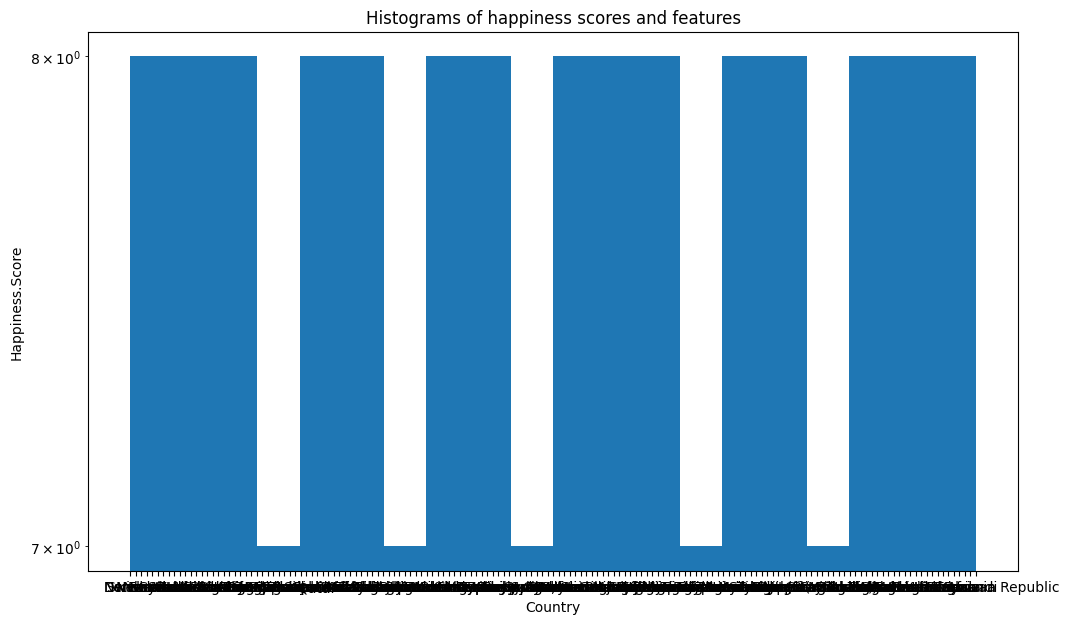

In [8]:
##This method is based on what I learned in class. This histogram, is very specific to the happiness score column
plt.figure(figsize=(12,7))
plt.hist(happy_df['Country'].dropna(),bins= 20) # Drop NaN values for the histogram
plt.title("Histograms of happiness scores and features")
plt.xlabel('Country')
plt.ylabel('Happiness.Score')
plt.yscale("log")
plt.show()

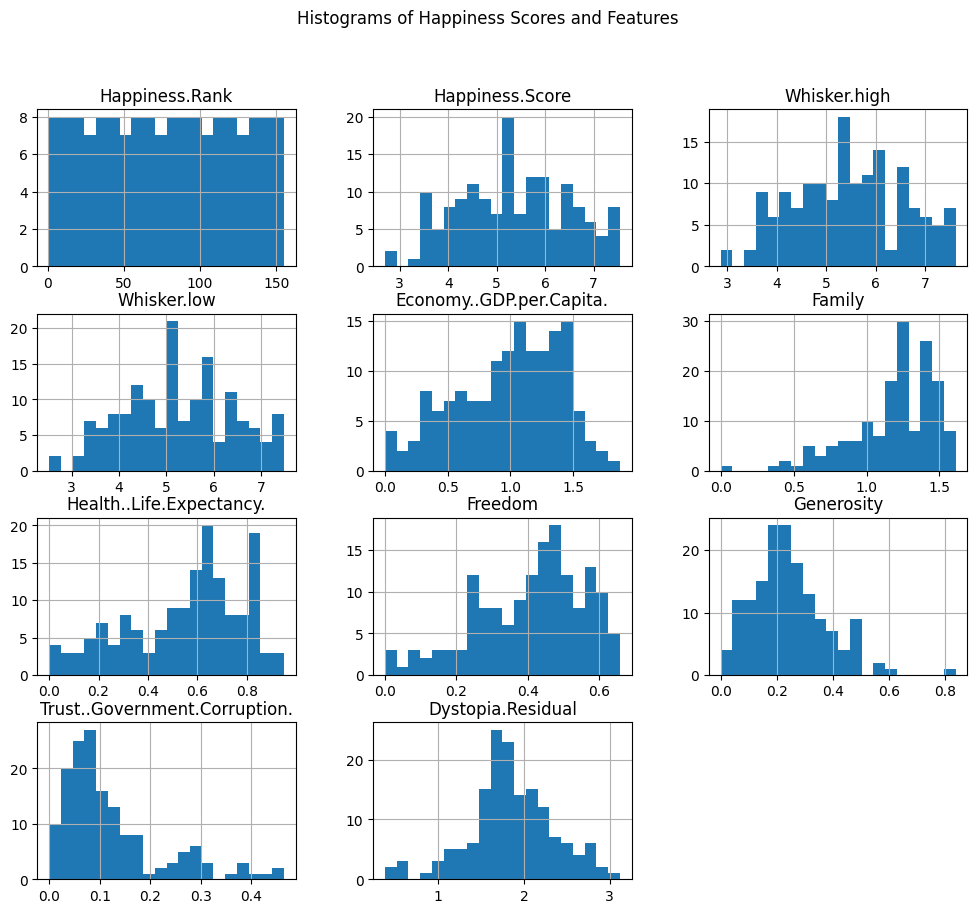

In [9]:
## Here I used pandas hist Method to create histograms for all numerical data in the DataFrame
# I am plotting histograms for all numerical columns
happy_df.hist(figsize=(12, 10), bins=20)  # Adjust bins as needed
plt.suptitle('Histograms of Happiness Scores and Features')
plt.show()

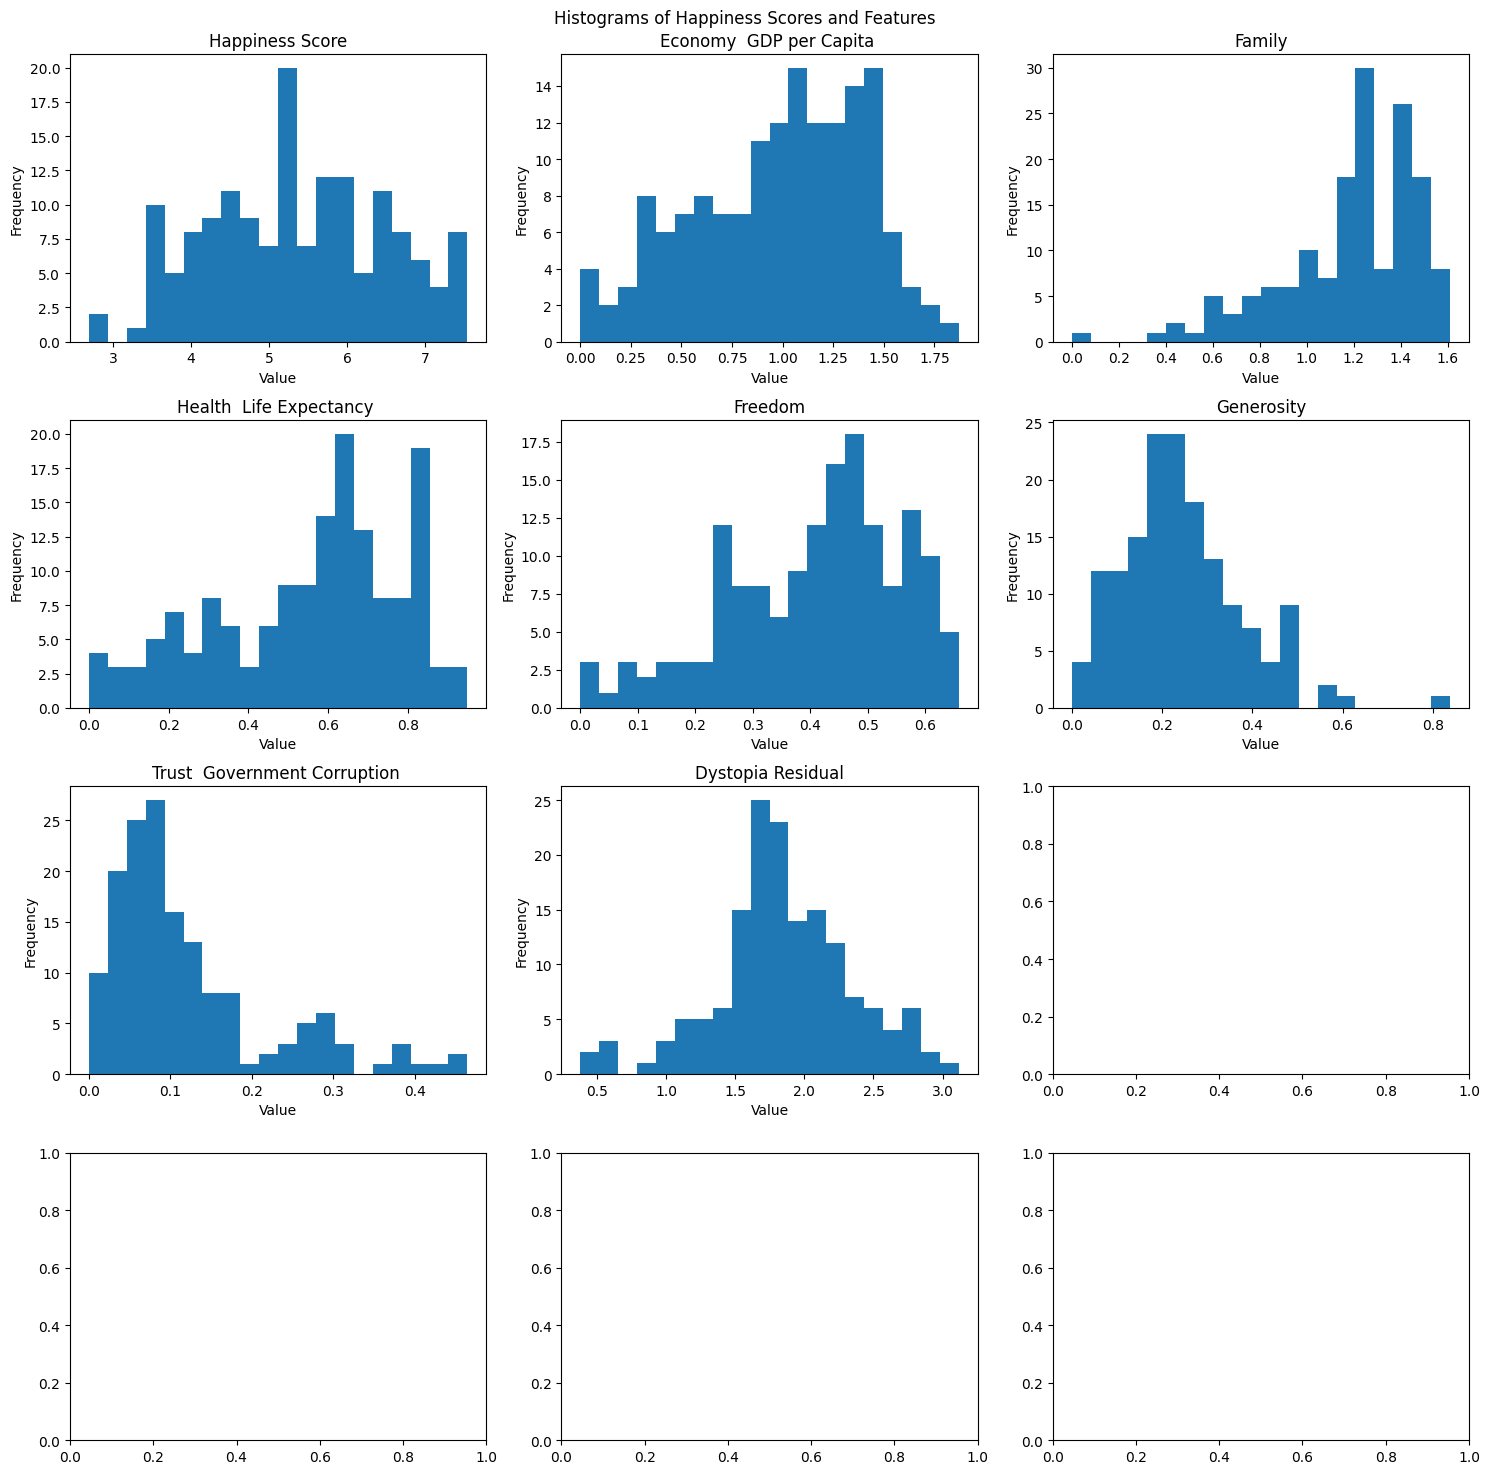

In [12]:
##Here I used the Matplotlib hist Function to create histograms for all numerical data in the DataFrame
# First, I create a figure and axis
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))  # Adjust rows and columns based on the number of features
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Second step is to list of columns to plot
columns = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 
           'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

for i, col in enumerate(columns):
    axes[i].hist(happy_df[col].dropna(), bins=20)  # I want to drop NaN values for the histogram
    title = col.replace('.', ' ')
    axes[i].set_title(title)  # I would like to use the column name as the title, but to replace the (.) with spaces for a clean look
    axes[i].set_xlabel('Value')  # X-axis label representing the feature values
    axes[i].set_ylabel('Frequency')  # Y-axis label representing the count of occurrences

plt.tight_layout()
plt.suptitle('Histograms of Happiness Scores and Features')
plt.subplots_adjust(top=0.95)  # Adjust the title position
plt.show()


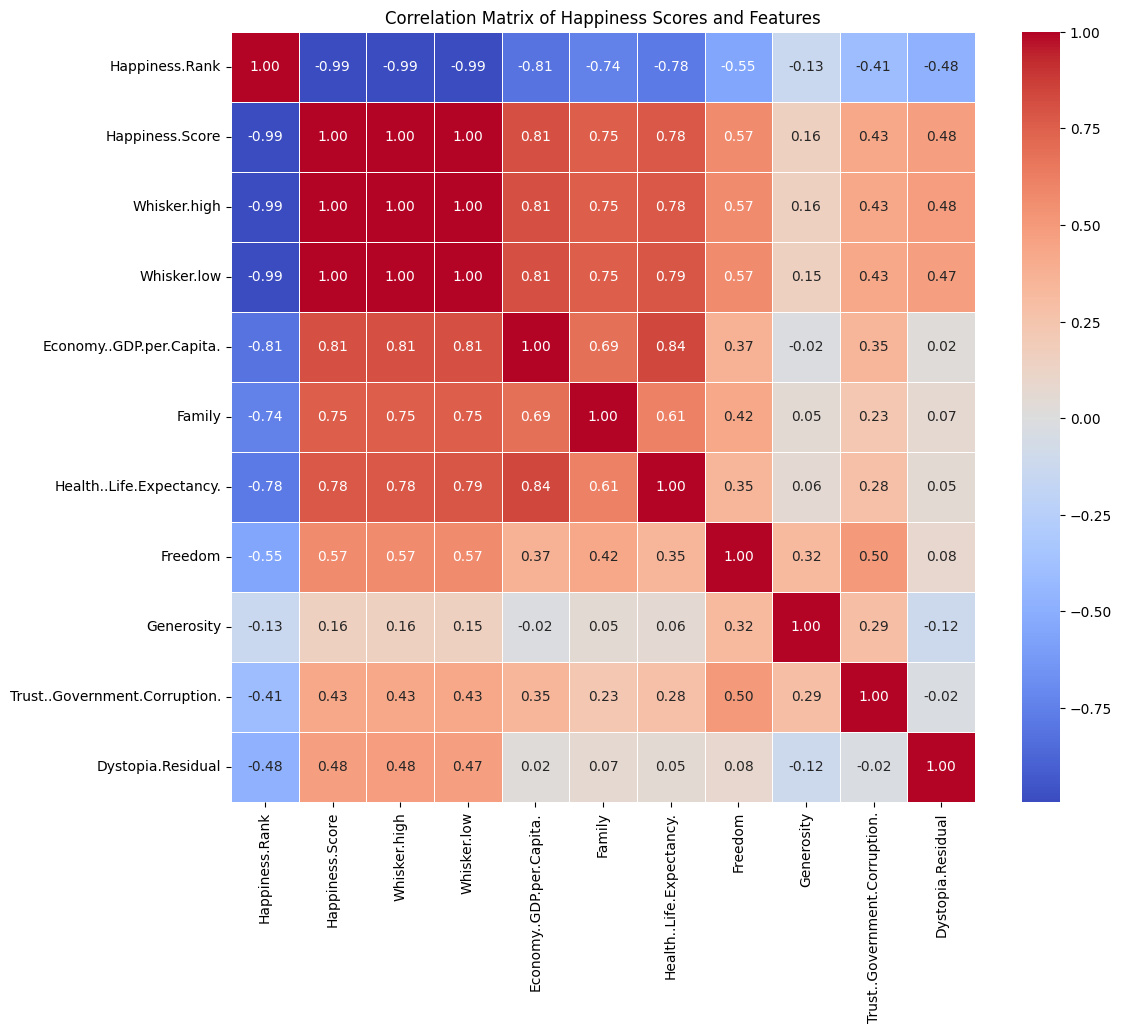

In [10]:
#Bivariate: Correlation matrix - I will visualize this using a heatmap. I will use 2 methods.
##Method A
numeric_df = happy_df.select_dtypes(include=[np.number]) #I need to ensure only numeric data is selected for this
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) #I would like to add plot customizations, by using cmap='coolwarm' for the heatmap and includes annotations (annot=True) with two decimal precision (fmt='.2f'). I am including linewidths=0.5 to add lines between cells to improve readability.
plt.title('Correlation Matrix of Happiness Scores and Features') #I am adding the title
plt.show()

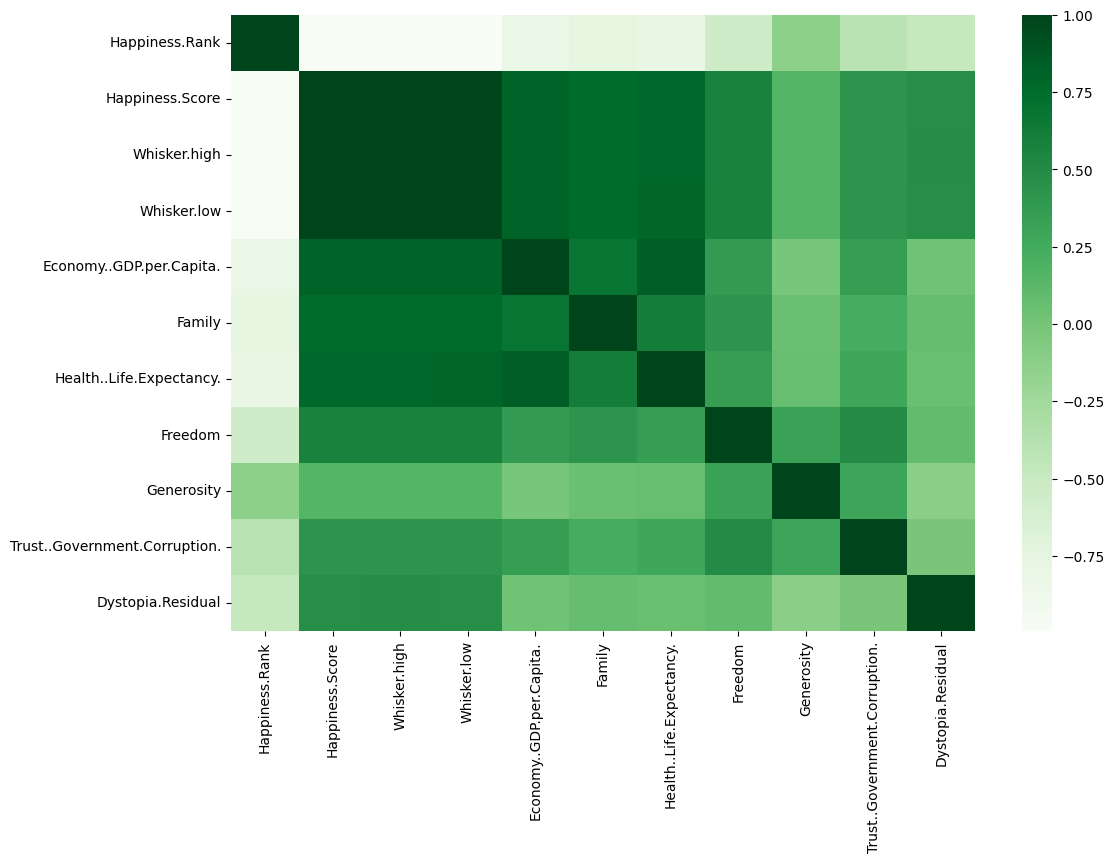

In [14]:
##Method B
# Select only numeric columns
numeric_df = happy_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8)) #I have set the size a little smaller, just to see how it will compare
sns.heatmap(corr, cmap="Greens", xticklabels=corr.columns, yticklabels=corr.columns, square=False) #for this method, I have not included annotations. I have set the xticklabels and yticklabels to the column name
plt.show()

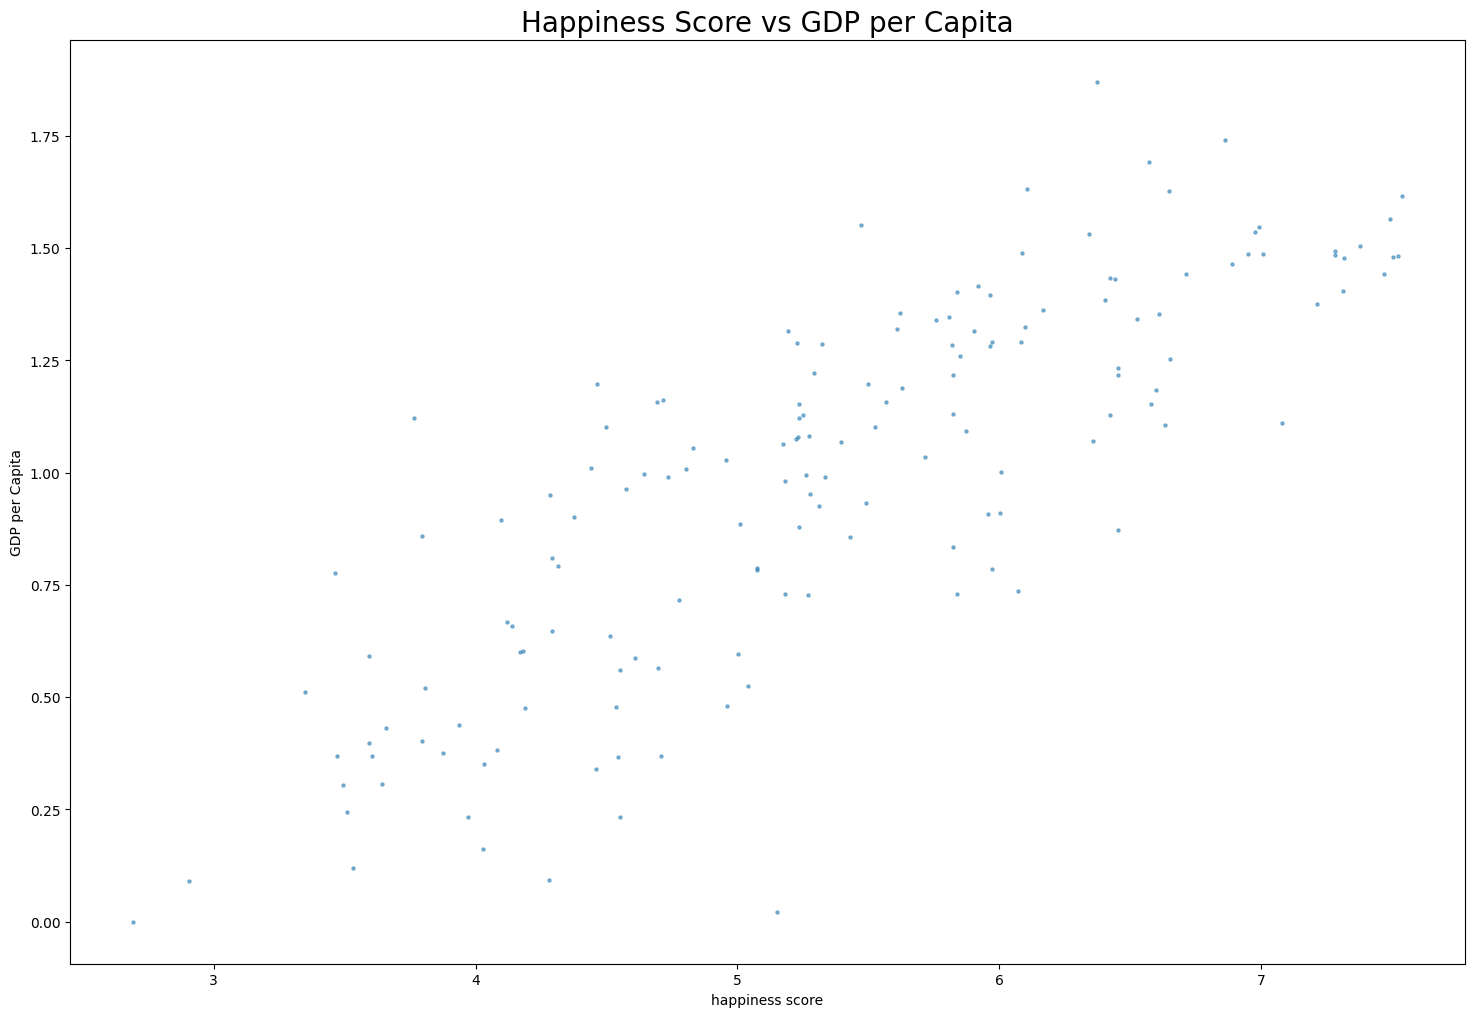

In [15]:
#Bivariate: Scatter plot; here I single out happiness score bs GDP per Capita; to see if countries with higher GDP were happier
x=happy_df["Happiness.Score"]
y=happy_df["Economy..GDP.per.Capita."]
fig,ax=plt.subplots(figsize=(18,12))
plt.scatter(x,y,alpha=0.5,s=5)
plt.title("Happiness Score vs GDP per Capita",fontsize=20)
plt.xlabel("happiness score")
plt.ylabel("GDP per Capita")
for index , row in happy_df.iterrows():
    x=row["Happiness.Score"]
    y=row["Economy..GDP.per.Capita."]
    if((500000000>x>260000000) | (y>160)):
        plt.annotate(s=row["title"],xy=(x,y),rotation=20)

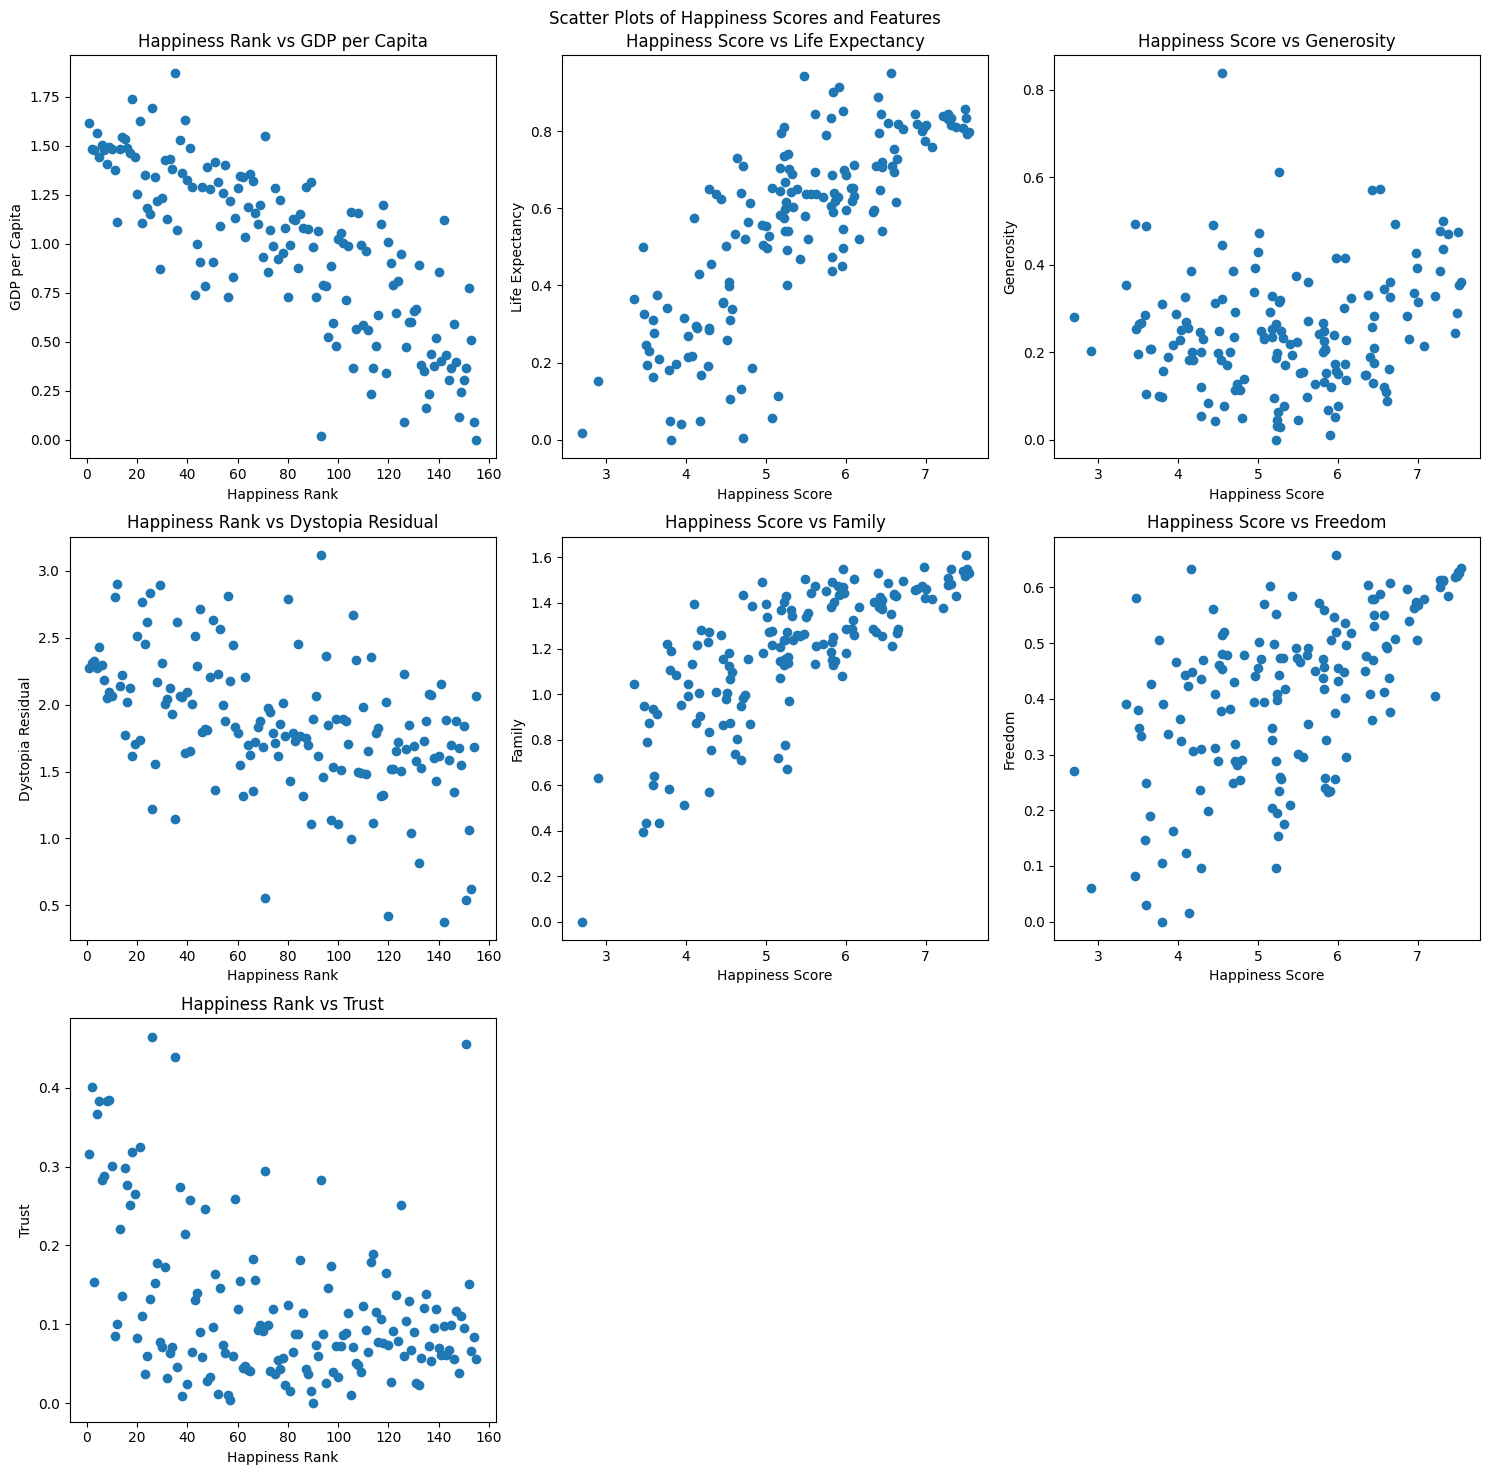

In [16]:
#Bivariate: Scatter plot; I have selected different pairs for comparison purposes

# I define the number of rows and columns for subplots'
nrows = 3
ncols = 3

# I Create a figure and axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15)) #Creates a grid of 3x3 subplots, with a total of 9 subplots.


# Flatten the array of axes for easy iteration
axes = axes.flatten() #Flattens the 2D array of axes into a 1D array for easy indexing.

# Next, I create scatter plots for selected pairs
# 1 - GDP vs Happiness Rank
axes[0].scatter(happy_df['Happiness.Rank'], happy_df['Economy..GDP.per.Capita.'])
axes[0].set_xlabel('Happiness Rank')
axes[0].set_ylabel('GDP per Capita')
axes[0].set_title('Happiness Rank vs GDP per Capita')

# 2 - Life Expectancy vs Happiness Score
axes[1].scatter(happy_df['Happiness.Score'], happy_df['Health..Life.Expectancy.'])
axes[1].set_xlabel('Happiness Score')
axes[1].set_ylabel('Life Expectancy')
axes[1].set_title('Happiness Score vs Life Expectancy')

# 3 - Generosity vs Happiness Score
axes[2].scatter(happy_df['Happiness.Score'], happy_df['Generosity'])
axes[2].set_xlabel('Happiness Score')
axes[2].set_ylabel('Generosity')
axes[2].set_title('Happiness Score vs Generosity')

# 4 - Dystopia Residual vs Happiness Rank
axes[3].scatter(happy_df['Happiness.Rank'], happy_df['Dystopia.Residual'])
axes[3].set_xlabel('Happiness Rank')
axes[3].set_ylabel('Dystopia Residual')
axes[3].set_title('Happiness Rank vs Dystopia Residual')

# 5 - Family vs Happiness Score
axes[4].scatter(happy_df['Happiness.Score'], happy_df['Family'])
axes[4].set_xlabel('Happiness Score')
axes[4].set_ylabel('Family')
axes[4].set_title('Happiness Score vs Family')

# 6 - Freedom vs Happiness Score
axes[5].scatter(happy_df['Happiness.Score'], happy_df['Freedom'])
axes[5].set_xlabel('Happiness Score')
axes[5].set_ylabel('Freedom')
axes[5].set_title('Happiness Score vs Freedom')

# 7 - Trust vs Happiness Rank
axes[6].scatter(happy_df['Happiness.Rank'], happy_df['Trust..Government.Corruption.'])
axes[6].set_xlabel('Happiness Rank')
axes[6].set_ylabel('Trust')
axes[6].set_title('Happiness Rank vs Trust')

# To turn off unused subplots if needed
for i in range(7, len(axes)):
    fig.delaxes(axes[i])#axes[i]: Accesses each subplot using the flattened index and removes any extra subplots that are not used, ensuring the layout is clean.

plt.tight_layout()
plt.suptitle('Scatter Plots of Happiness Scores and Features')
plt.subplots_adjust(top=0.95)  # Adjust the title position
plt.show()

In [11]:
#first we confirm that country is category
happy_df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [12]:
# 'Country' is a categorical variable and I want to visualize 'Happiness.Score' vs 'Family' for each country
print(happy_df['Country'].nunique()) #To understand the range, we need to check the number of unique values in 'Country'. If 'Country' has too many unique values, it may result in a grid that's too large to display effectively.


155


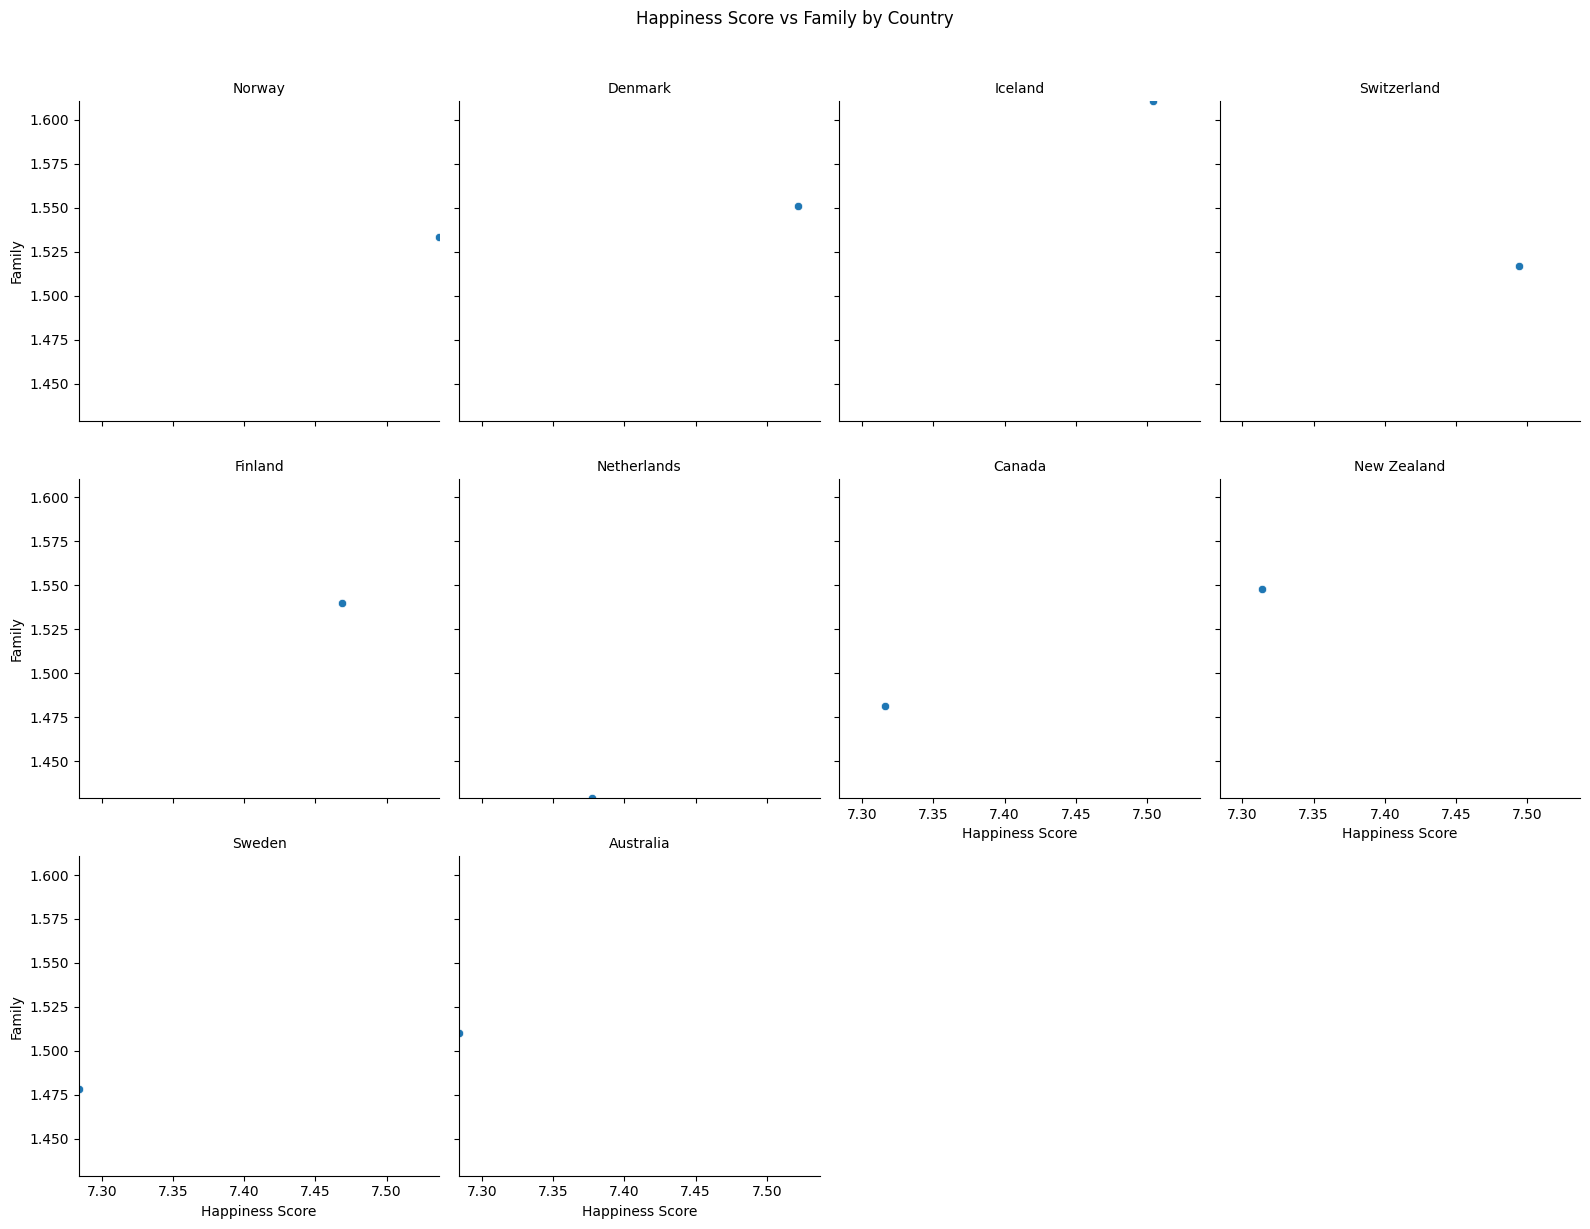

In [13]:
#155 is a big range that cannot be displayed effectively, to resolve this, I will select a subset to display
# Select the top 10 countries with the highest Happiness Score
top_countries = happy_df.nlargest(10, 'Happiness.Score')['Country'].unique()
subset_df = happy_df[happy_df['Country'].isin(top_countries)]

subset_df = subset_df.dropna(subset=['Happiness.Score', 'Family']) # I need to ensure that there are no NaN values affecting the plots

# I create a FacetGrid
g = sns.FacetGrid(subset_df, col='Country', col_wrap=4, height=4)   # the col_wrap and height can be adjusted. This creates a subplot for each unique value in the Country column. It also wraps the columns after 4 plots
g.map(sns.scatterplot, 'Happiness.Score', 'Family') #Maps a scatter plot onto each subplot.

# I need to set common axis limits to ensure no values are filtered out
xlim = (subset_df['Happiness.Score'].min(), subset_df['Happiness.Score'].max())
ylim = (subset_df['Family'].min(), subset_df['Family'].max())

# Next step is to apply the defibed axis limits to all subplots
for ax in g.axes.flat:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Happiness Score', 'Family')
plt.suptitle('Happiness Score vs Family by Country', y=1.02)   #the title position can be adjusted

# Finally I adjust layout to prevent overlap
plt.tight_layout()
plt.show()

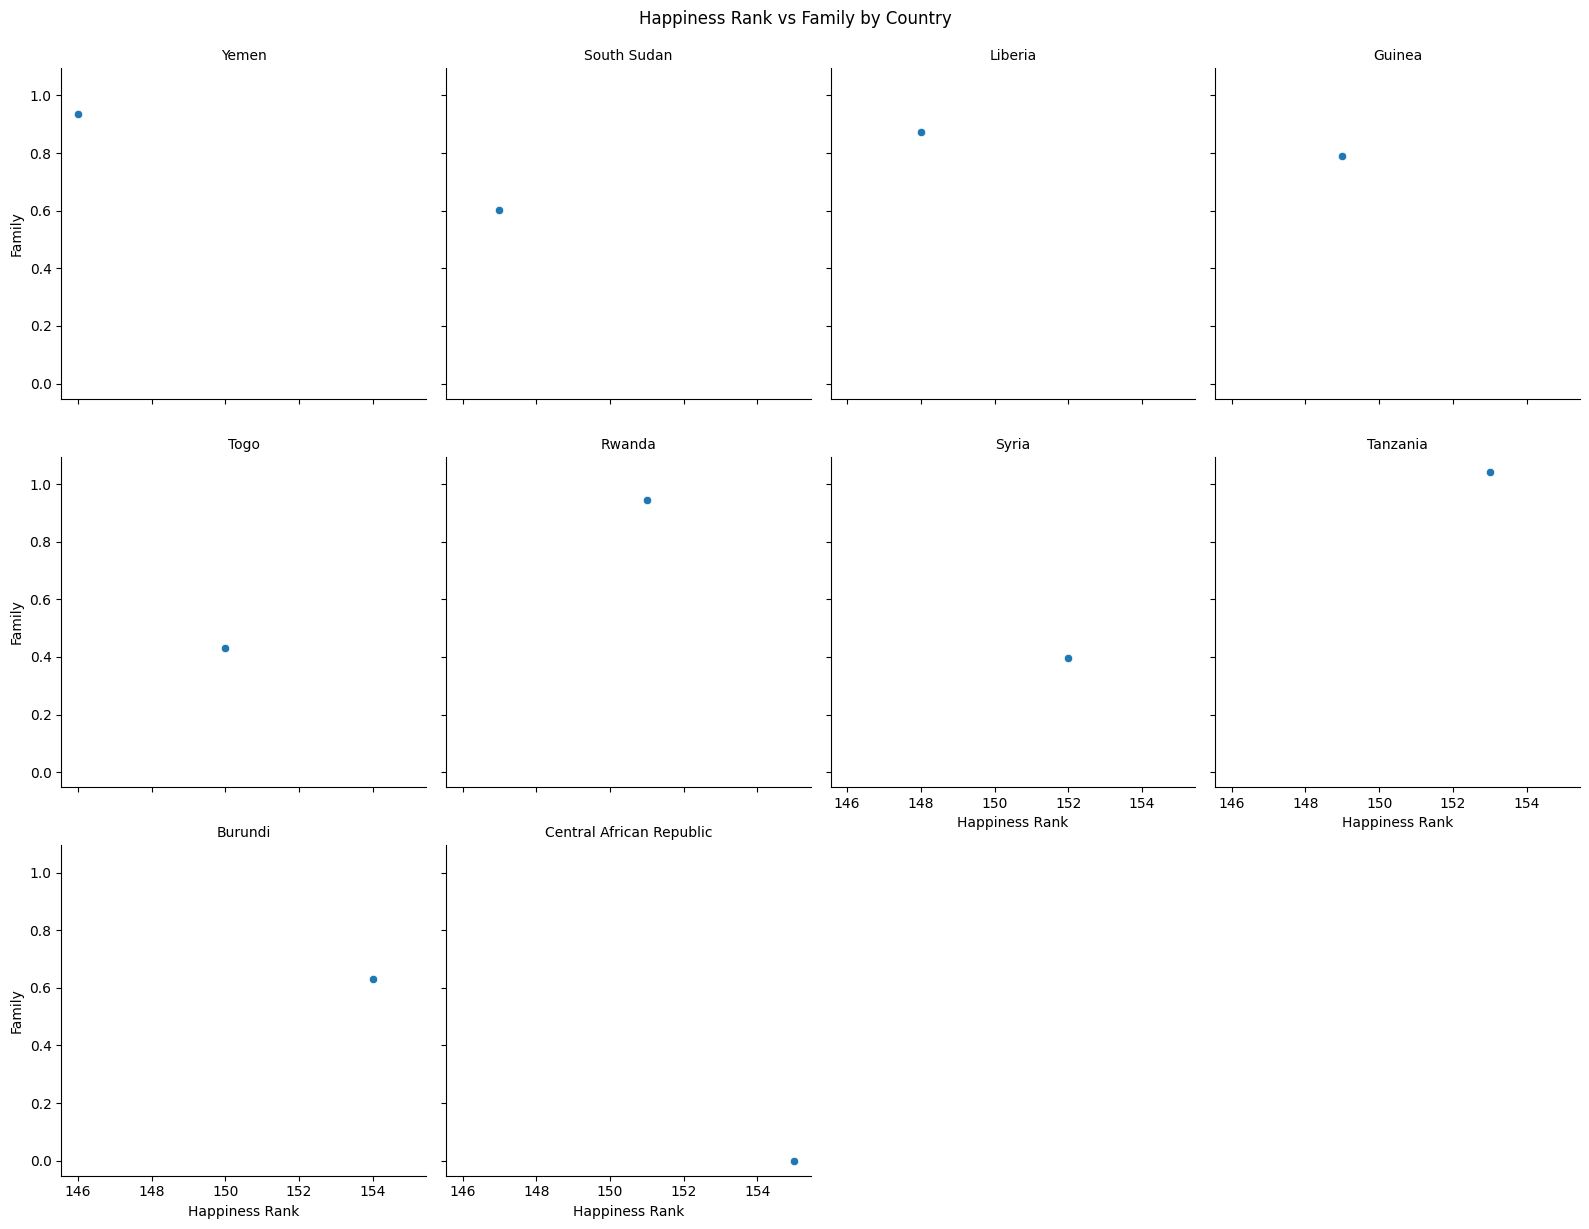

In [14]:
# Select the top 10 countries with the highest Happiness Rank
top_countries = happy_df.nlargest(10, 'Happiness.Rank')['Country'].unique()
subset_df = happy_df[happy_df['Country'].isin(top_countries)]

# I create a FacetGrid
g = sns.FacetGrid(subset_df, col='Country', col_wrap=4, height=4)   # the col_wrap and height can be adjusted. This creates a subplot for each unique value in the Country column. It also wraps the columns after 4 plots
g.map(sns.scatterplot, 'Happiness.Rank', 'Family') #Maps a scatter plot onto each subplot.

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Happiness Rank', 'Family')
plt.suptitle('Happiness Rank vs Family by Country', y=1.02)   #the title position can be adjusted

plt.show()

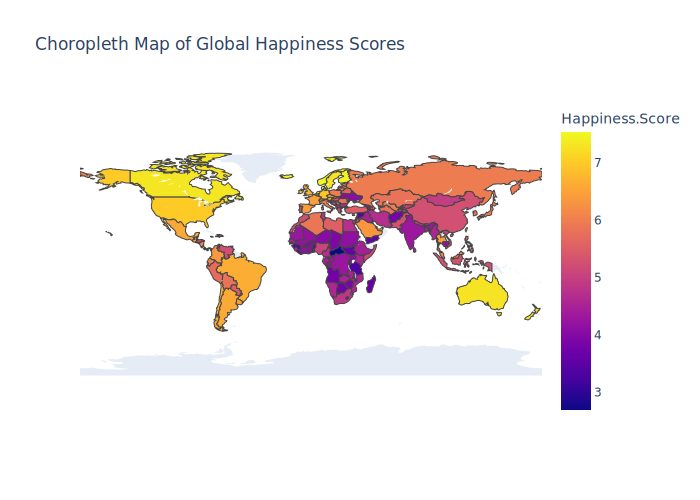

In [17]:
#To create a choropleth map, I first installed plotly - pip install plotly pandas. 

import plotly.io as pio
pio.renderers.default = 'svg'       #This will display the map as an SVG image; for this I had to install kaleido

# First, I create the choropleth map
fig = px.choropleth(
    happy_df,
    locations="Country",                # Column containing the country names
    locationmode="country names",       # Match country names to location names
    color="Happiness.Score",            # Column containing happiness scores, this will determine the color intensity on the map
    hover_name="Country",               # To show the country name when hovering over it
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale used to determine the color intensity on the map
    title="Global Happiness Scores"
)

# Update layout for better visualization
fig.update_layout(
    title_text='Choropleth Map of Global Happiness Scores',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'  # Change the map projection if needed
    ),
)

# Show the map
fig.show()


In [18]:
import plotly.io as pio
pio.renderers.default = 'browser'  # This will open the map in a new browser window

fig = px.choropleth(
    happy_df,
    locations="Country",               
    locationmode="country names",           color="Happiness.Score",          
    hover_name="Country",             
    color_continuous_scale=px.colors.sequential.Plasma,  
    title="Global Happiness Scores"
)

fig.update_layout(
    title_text='Choropleth Map of Global Happiness Scores',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='mercator' 
    ),
)
fig.show()

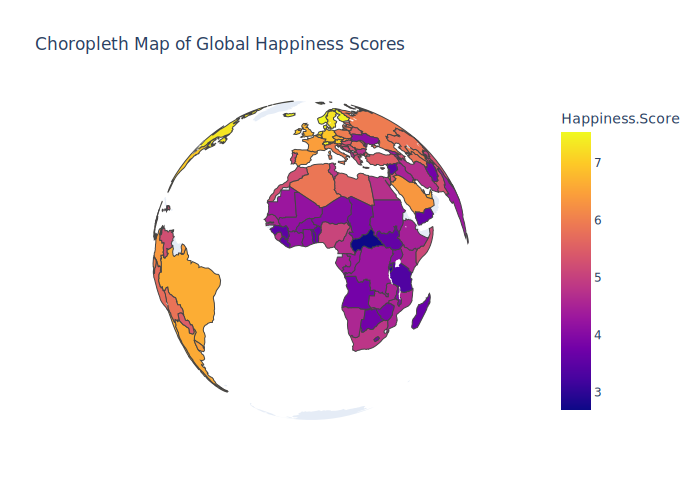

In [19]:
import plotly.io as pio
pio.renderers.default = 'svg'  # This will open the map in a new browser window

fig = px.choropleth(
    happy_df,
    locations="Country",               
    locationmode="country names",           color="Happiness.Score",          
    hover_name="Country",             
    color_continuous_scale=px.colors.sequential.Plasma,  
    title="Global Happiness Scores"
)

fig.update_layout(
    title_text='Choropleth Map of Global Happiness Scores',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic' 
    ),
)
fig.show()
#I have observed that the Choropleth Map does not show on Jupyter Notebook

In [26]:
## I first define income groups based on Whisker.low.
conditions = [
    (happy_df['Whisker.low'] < happy_df['Whisker.low'].quantile(0.33)),
    (happy_df['Whisker.low'] >= happy_df['Whisker.low'].quantile(0.33)) & 
    (happy_df['Whisker.low'] < happy_df['Whisker.low'].quantile(0.67)),
    (happy_df['Whisker.low'] >= happy_df['Whisker.low'].quantile(0.67))
]

choices = ['Low Income', 'Middle Income', 'High Income']

happy_df['Income.Group'] = np.select(conditions, choices, default='Unknown')


##This is option 2:

#def categorize_income_group(row): ##This function assigns each country to an income group (Low, Medium-Low, Medium-High, High) based on the Whisker.low and Whisker.high values
    #return pd.cut([row['Whisker.low'], row['Whisker.high']], bins=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])[0]
#happy_df['Income Group'] = happy_df.apply(categorize_income_group, axis=1)

##the pd.cut function divides the range between Whisker.low and Whisker.high into four equal bins, corresponding to the income groups.
##The result is stored in a new column Income Group, which categorizes each country based on these bins.

In [27]:
happy_df

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual Income.Group  \
0                         0.315964           2.277027  High Income   
1                         0.400770           2.313707  High Income   
2                         0.153527           2.322715  High Income   
3                         0.367007           2.276716  High Income   
4                         0.382612           2.430182  High Income   
..                             ...                ...          ...   
150                       0.455220           0.540061   Low Income   
151                       0.151347           1.061574   Low Income   
152                       0.066035           0.621130   Low Income   
153                       0.084148           1.683024   Low Income   
154                       0.056565           2.066005   Low Income   

    Income Group  
0            Low  
1            Low  
2            Low  
3            Low  
4            Low  
..           ...  
150          Low  
151          Low  
152          Low  
153          Low  
154          Low  

[155 rows x 14 columns]

In [29]:
##I run both options and as you can see, I have 2 columns with different values; I would like to drop one of the columns:
happy_df = happy_df.drop(columns=['Income Group'])


In [30]:
happy_df

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual Income.Group  
0                         0.315964           2.277027  High Income  
1                         0.400770           2.313707  High Income  
2                         0.153527           2.322715  High Income  
3                         0.367007           2.276716  High Income  
4                         0.382612           2.430182  High Income  
..                             ...                ...          ...  
150                       0.455220           0.540061   Low Income  
151                       0.151347           1.061574   Low Income  
152                       0.066035           0.621130   Low Income  
153                       0.084148           1.683024   Low Income  
154                       0.056565           2.066005   Low Income  

[155 rows x 13 columns]

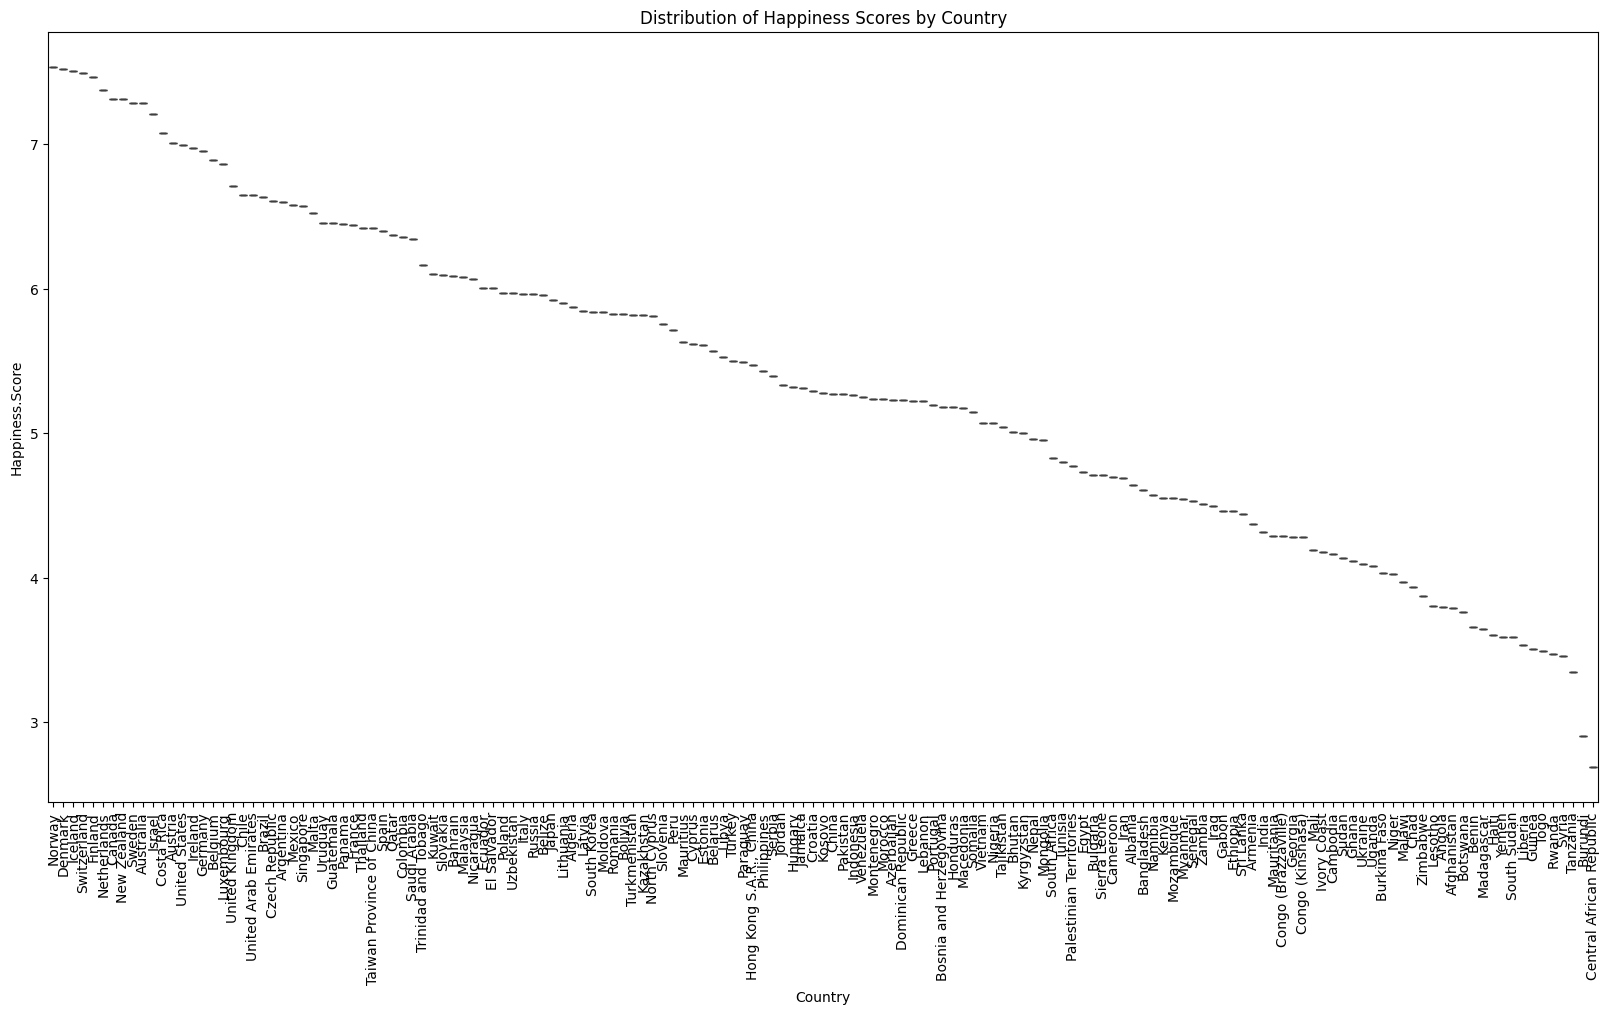

In [32]:
#Now that I have my categories, I proceed and visualize the distribution of the happiness score by country (region)

plt.figure(figsize=(20, 10))
sns.boxplot(x='Country', y='Happiness.Score', data=happy_df)
plt.title('Distribution of Happiness Scores by Country')
plt.xticks(rotation=90)
plt.show()



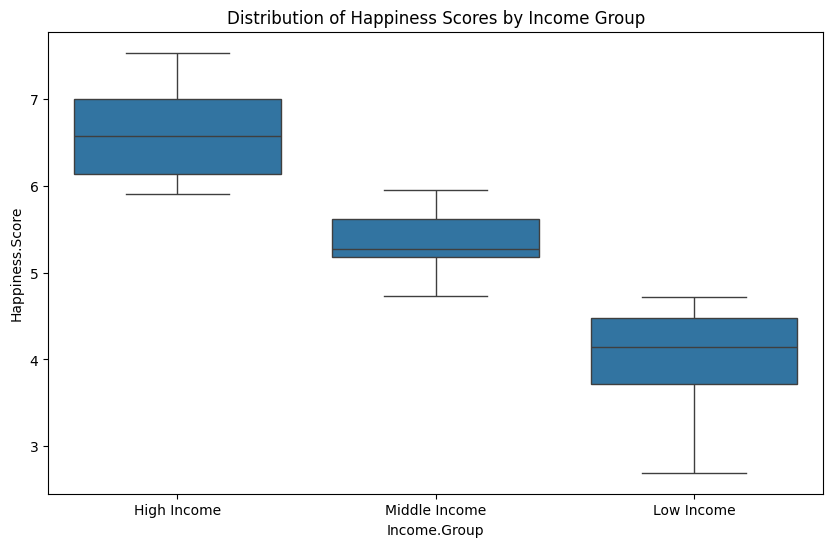

In [34]:
#Now that I have my categories, I proceed and visualize the distribution of the happiness score by income group

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income.Group', y='Happiness.Score', data=happy_df)
plt.title('Distribution of Happiness Scores by Income Group')
plt.show()

##Alternative is
#plt.figure(figsize=(10, 6))
#sns.countplot(x='Income Group', data=happy_df, palette='coolwarm', order=['Low', 'Medium-Low', 'Medium-High', 'High'])
#plt.title('Income Group Distribution Across Countries')
#plt.show()


##Using a box plot I have visualized the distribution of Happiness.Score across different Income Groups. This is to compare how happiness scores vary across income levels, providing a clear visualization of the central tendency and spread of happiness scores within each group.

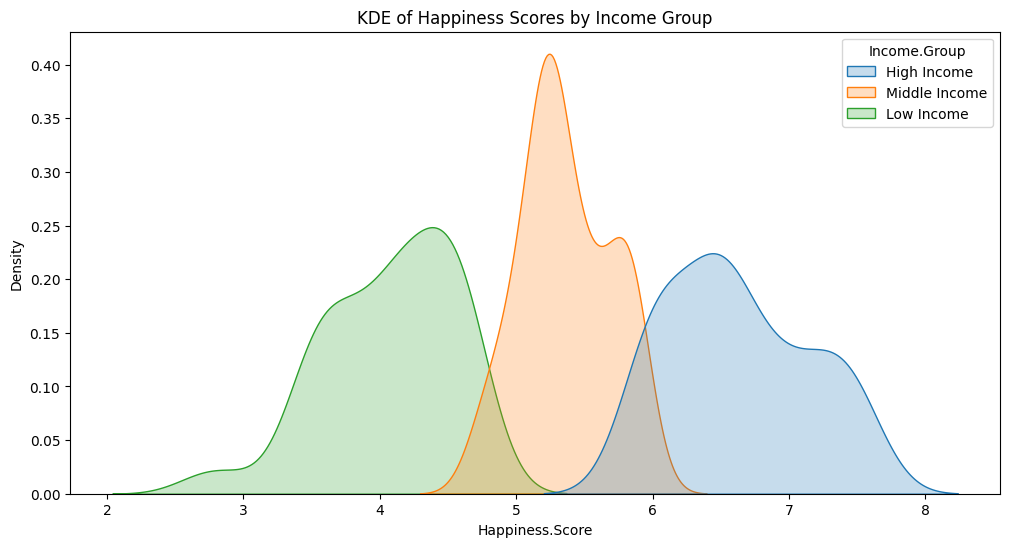

In [68]:
#To close it off, I will overlay the distribution Plots by Region (country) or Income Group

#1. By Income Group

plt.figure(figsize=(12, 6))
sns.kdeplot(data=happy_df, x='Happiness.Score', hue='Income.Group', fill=True)
plt.title('KDE of Happiness Scores by Income Group')
plt.show()


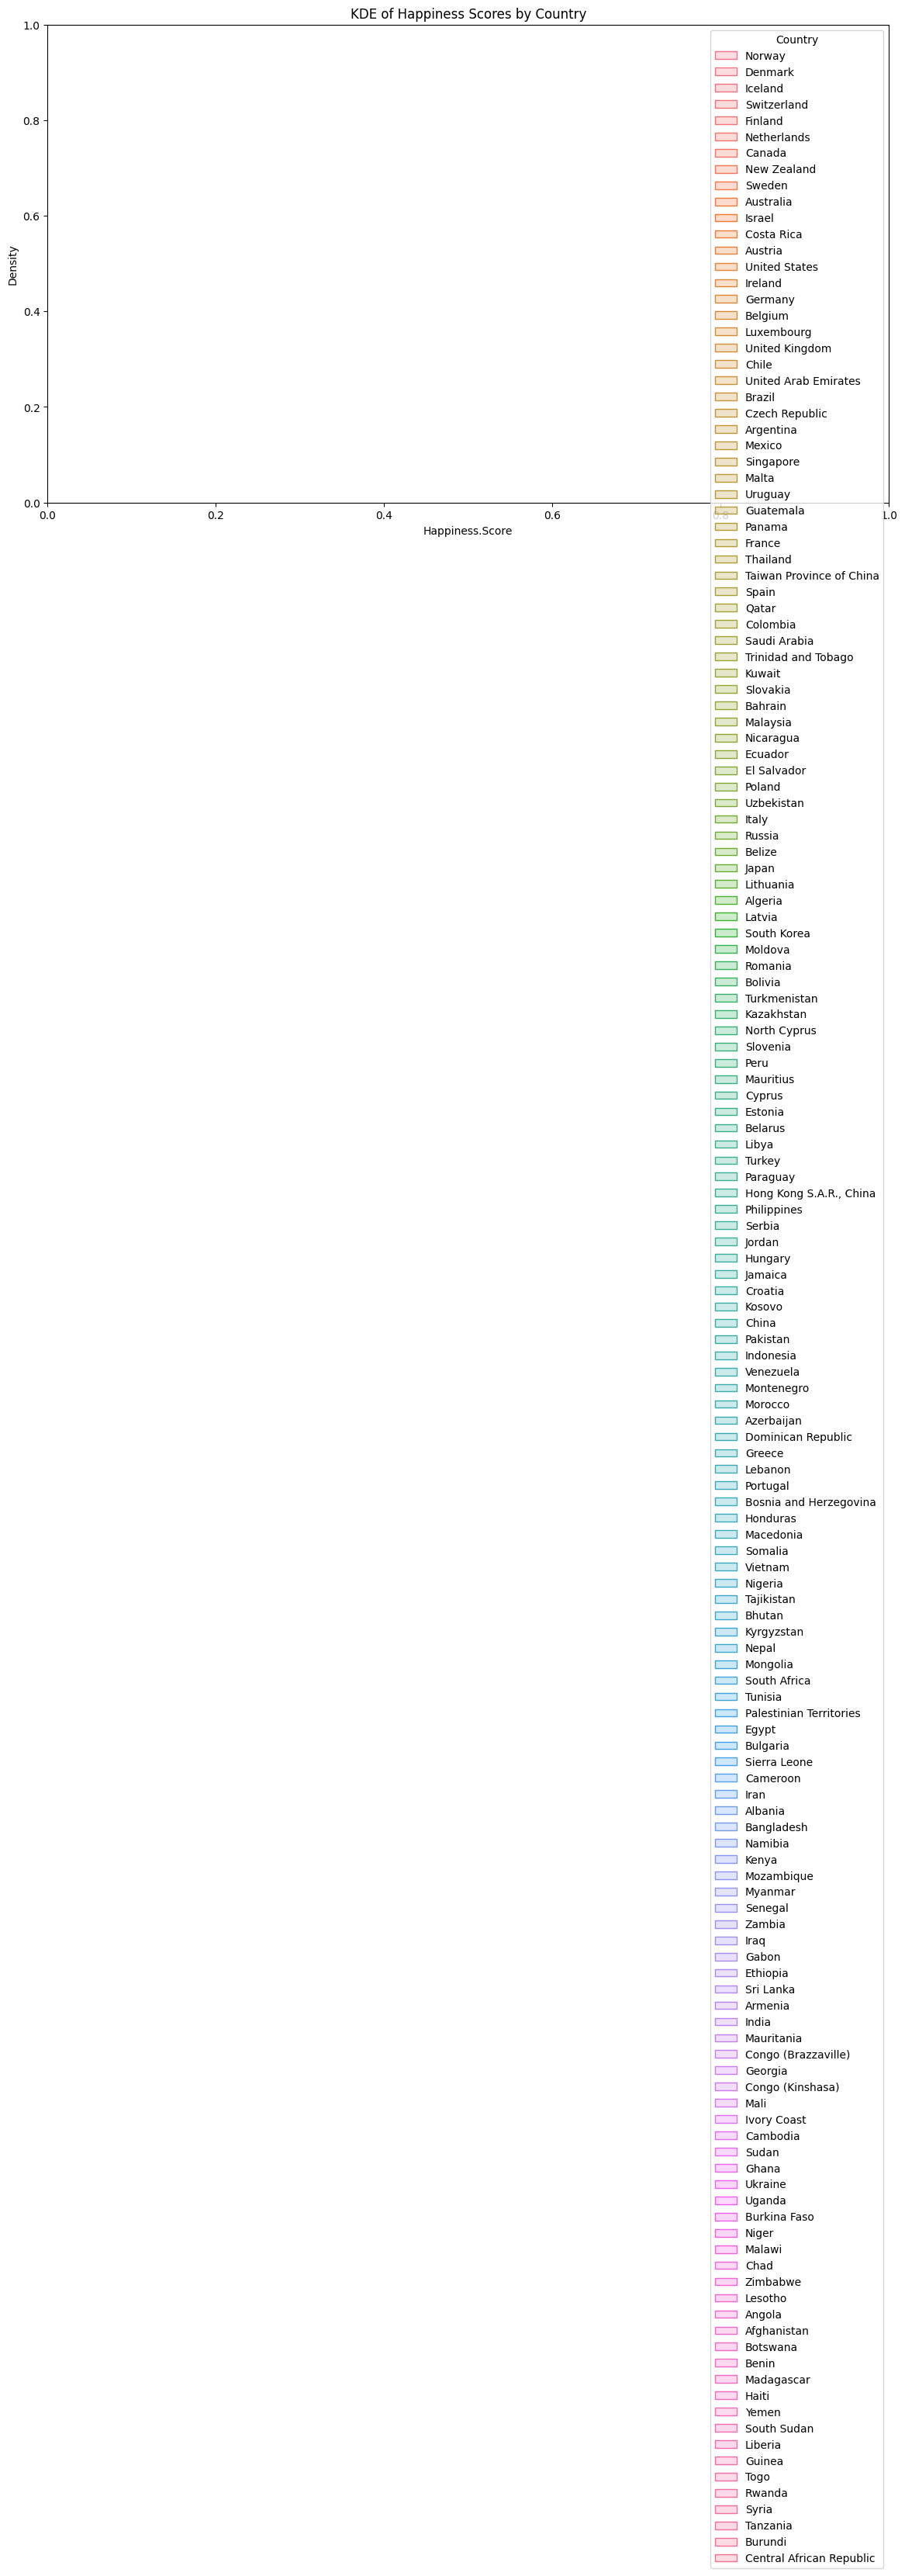

In [67]:
#2. By Region

plt.figure(figsize=(14, 8))
sns.kdeplot(data=happy_df, x='Happiness.Score', hue='Country', fill=True, warn_singular=False)
plt.title('KDE of Happiness Scores by Country')
plt.show()

#The plot does not display as expected

In [47]:
##Now I will run the alternatives. In this alternative, I will consider bowth whisker.high and whisker.low to create the income groups. So this will look a little different
def categorize_income_group(row):
    return pd.cut([row['Whisker.low'], row['Whisker.high']], bins=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])[0]
happy_df['Income Group'] = happy_df.apply(categorize_income_group, axis=1)

#With this, I have prepared new categories


In [48]:
happy_df

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual Income.Group  \
0                         0.315964           2.277027  High Income   
1                         0.400770           2.313707  High Income   
2                         0.153527           2.322715  High Income   
3                         0.367007           2.276716  High Income   
4                         0.382612           2.430182  High Income   
..                             ...                ...          ...   
150                       0.455220           0.540061   Low Income   
151                       0.151347           1.061574   Low Income   
152                       0.066035           0.621130   Low Income   
153                       0.084148           1.683024   Low Income   
154                       0.056565           2.066005   Low Income   

    Income Group  
0            Low  
1            Low  
2            Low  
3            Low  
4            Low  
..           ...  
150          Low  
151          Low  
152          Low  
153          Low  
154          Low  

[155 rows x 14 columns]

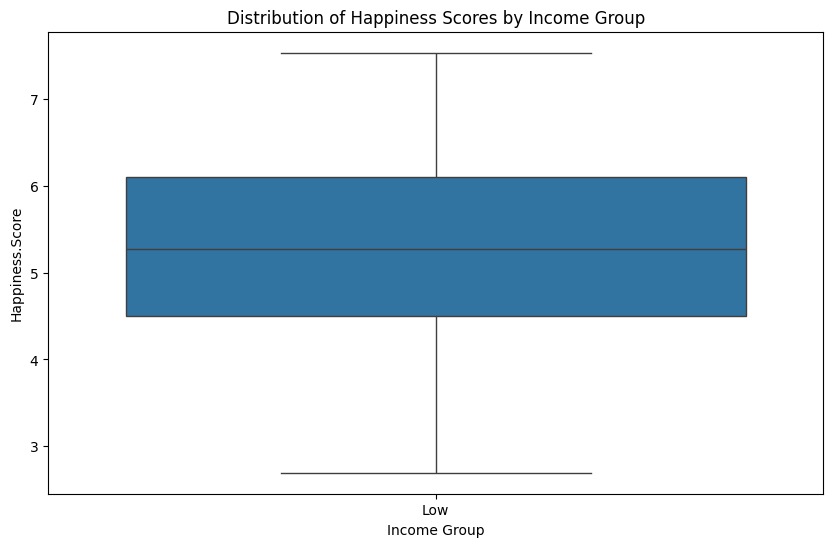

In [60]:
#With the new categories, I will now visualize Distribution of Happiness Scores by Income Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='Happiness.Score', data=happy_df)
plt.title('Distribution of Happiness Scores by Income Group')
plt.show()


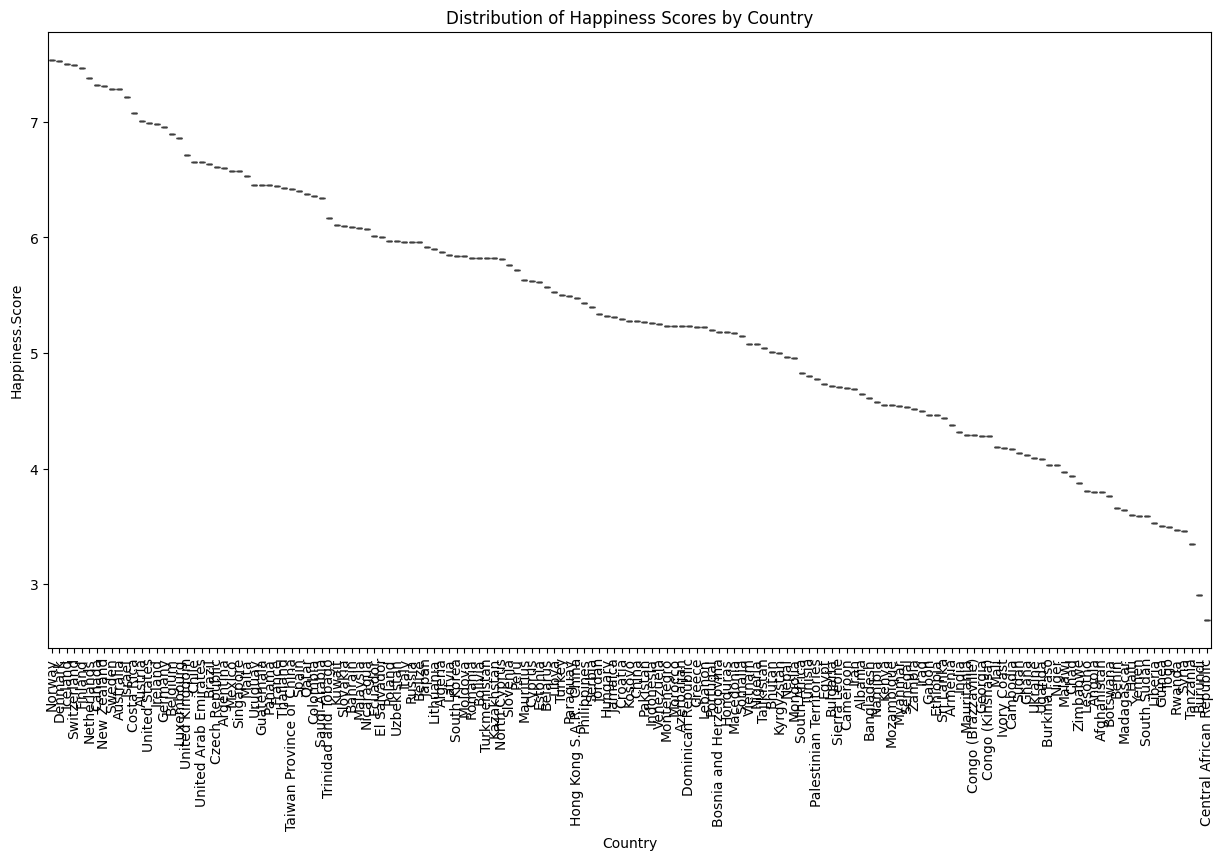

In [53]:
#I proceed to visualize Distribution of Happiness Scores by Region (country)
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Happiness.Score', data=happy_df)
plt.title('Distribution of Happiness Scores by Country')
plt.xticks(rotation=90) #This is for readability, since some countries can have long names
plt.show()


C:\Users\JanetGitonga\AppData\Local\Temp\ipykernel_18876\1608809213.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




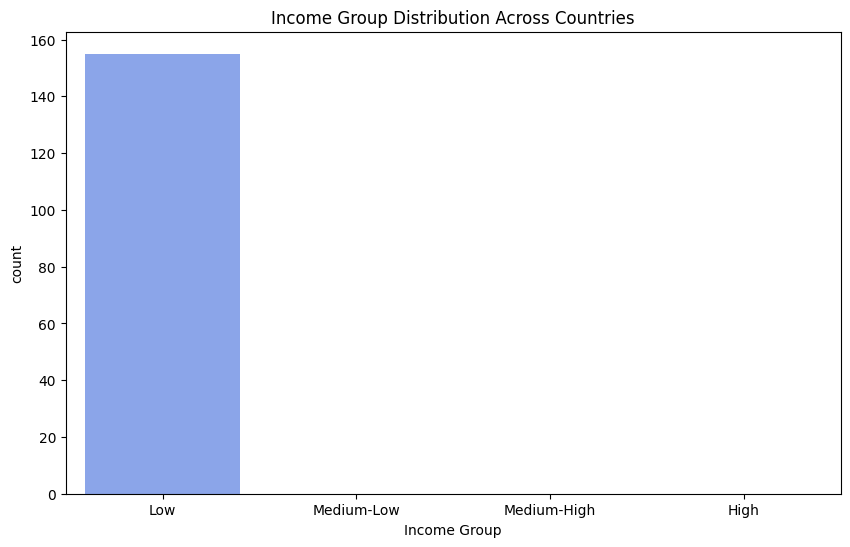

In [54]:
#Finally,I visualize the distribution of income groups (across countries), to identify which income categories are most common among the countries in the dataset.
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', data=happy_df, palette='coolwarm', order=['Low', 'Medium-Low', 'Medium-High', 'High'])
plt.title('Income Group Distribution Across Countries')
plt.show()


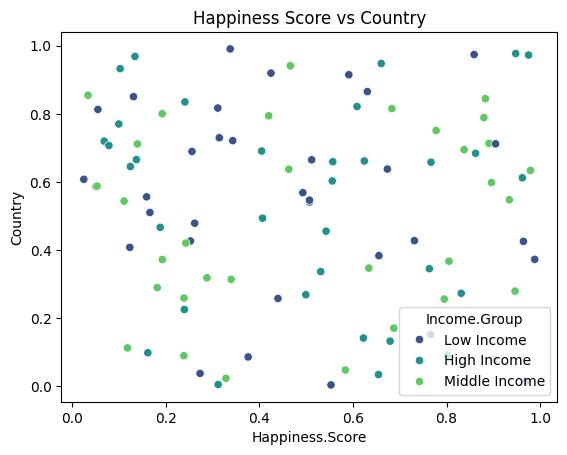

In [58]:
##There is need to comply with future seaborn standards; I will make some changes to my code:

data = {
    'Happiness.Score': np.random.rand(100),
    'Country': np.random.rand(100),
    'Income.Group': np.random.choice(['Low Income', 'Middle Income', 'High Income'], size=100)
}
df = pd.DataFrame(data)


sns.scatterplot(x='Happiness.Score', y='Country', data=df, hue='Income.Group', palette='viridis')

plt.title('Happiness Score vs Country')
plt.show()


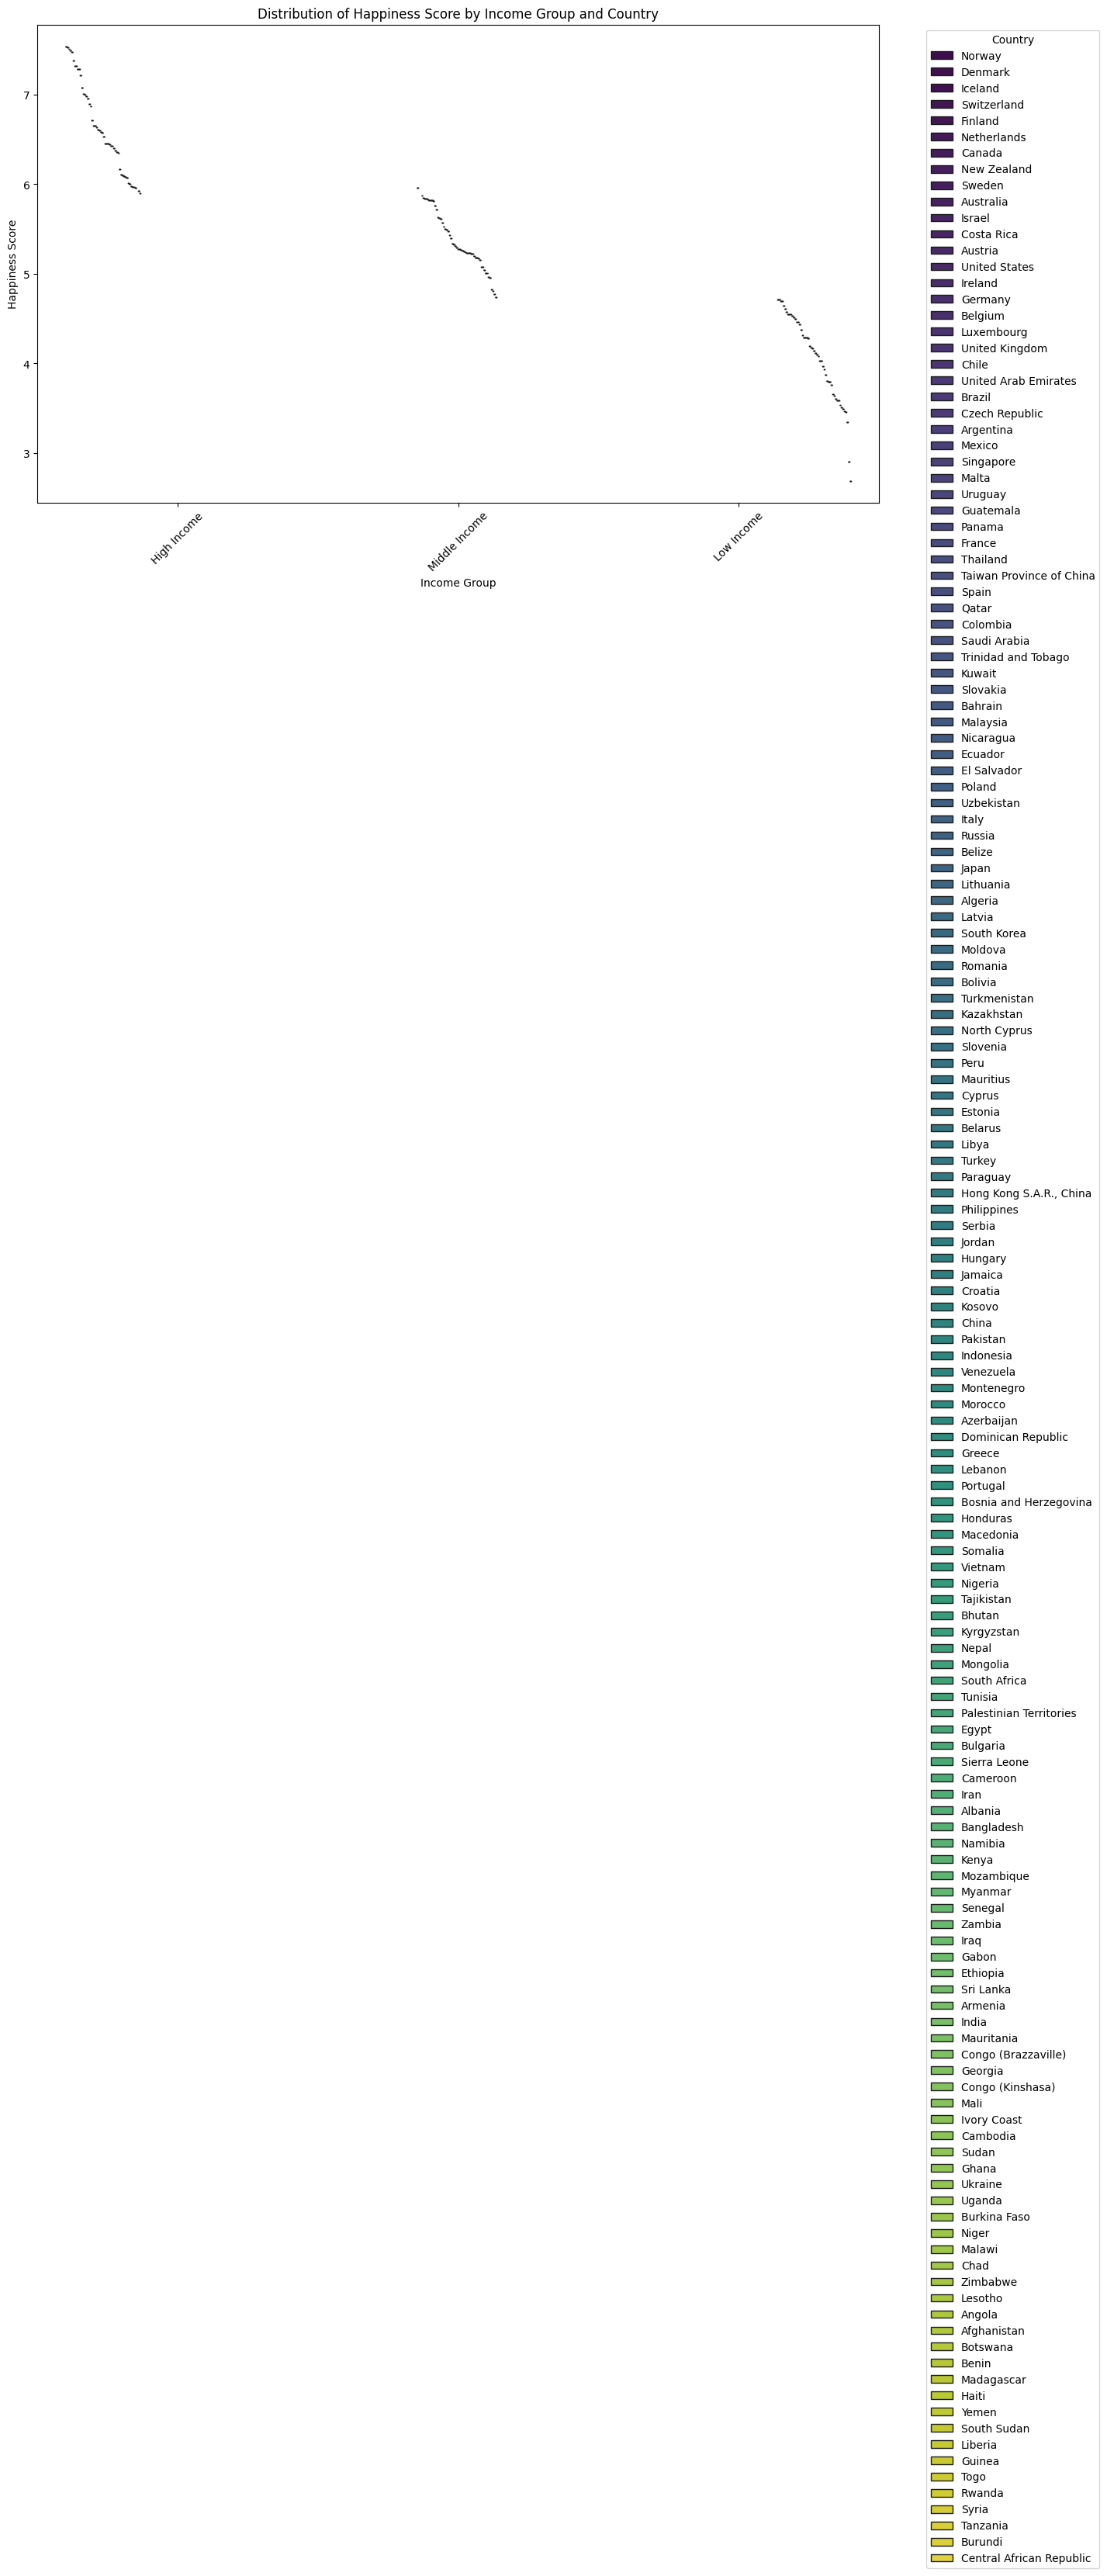

In [81]:
#I would like to compare the distribution of happiness score per income group per country. I'll do that through a box plot

# Box plot: Distribution of Happiness Score per Income Group and Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Income.Group', y='Happiness.Score', hue='Country', data=happy_df, palette='viridis')
plt.title('Distribution of Happiness Score by Income Group and Country')
plt.ylabel('Happiness Score')
plt.xlabel('Income Group')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


#In the map shows I am not able to know the country names; for that I will need to make a few changes in the next code.

C:\Users\JanetGitonga\AppData\Local\Temp\ipykernel_18876\376279118.py:20: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



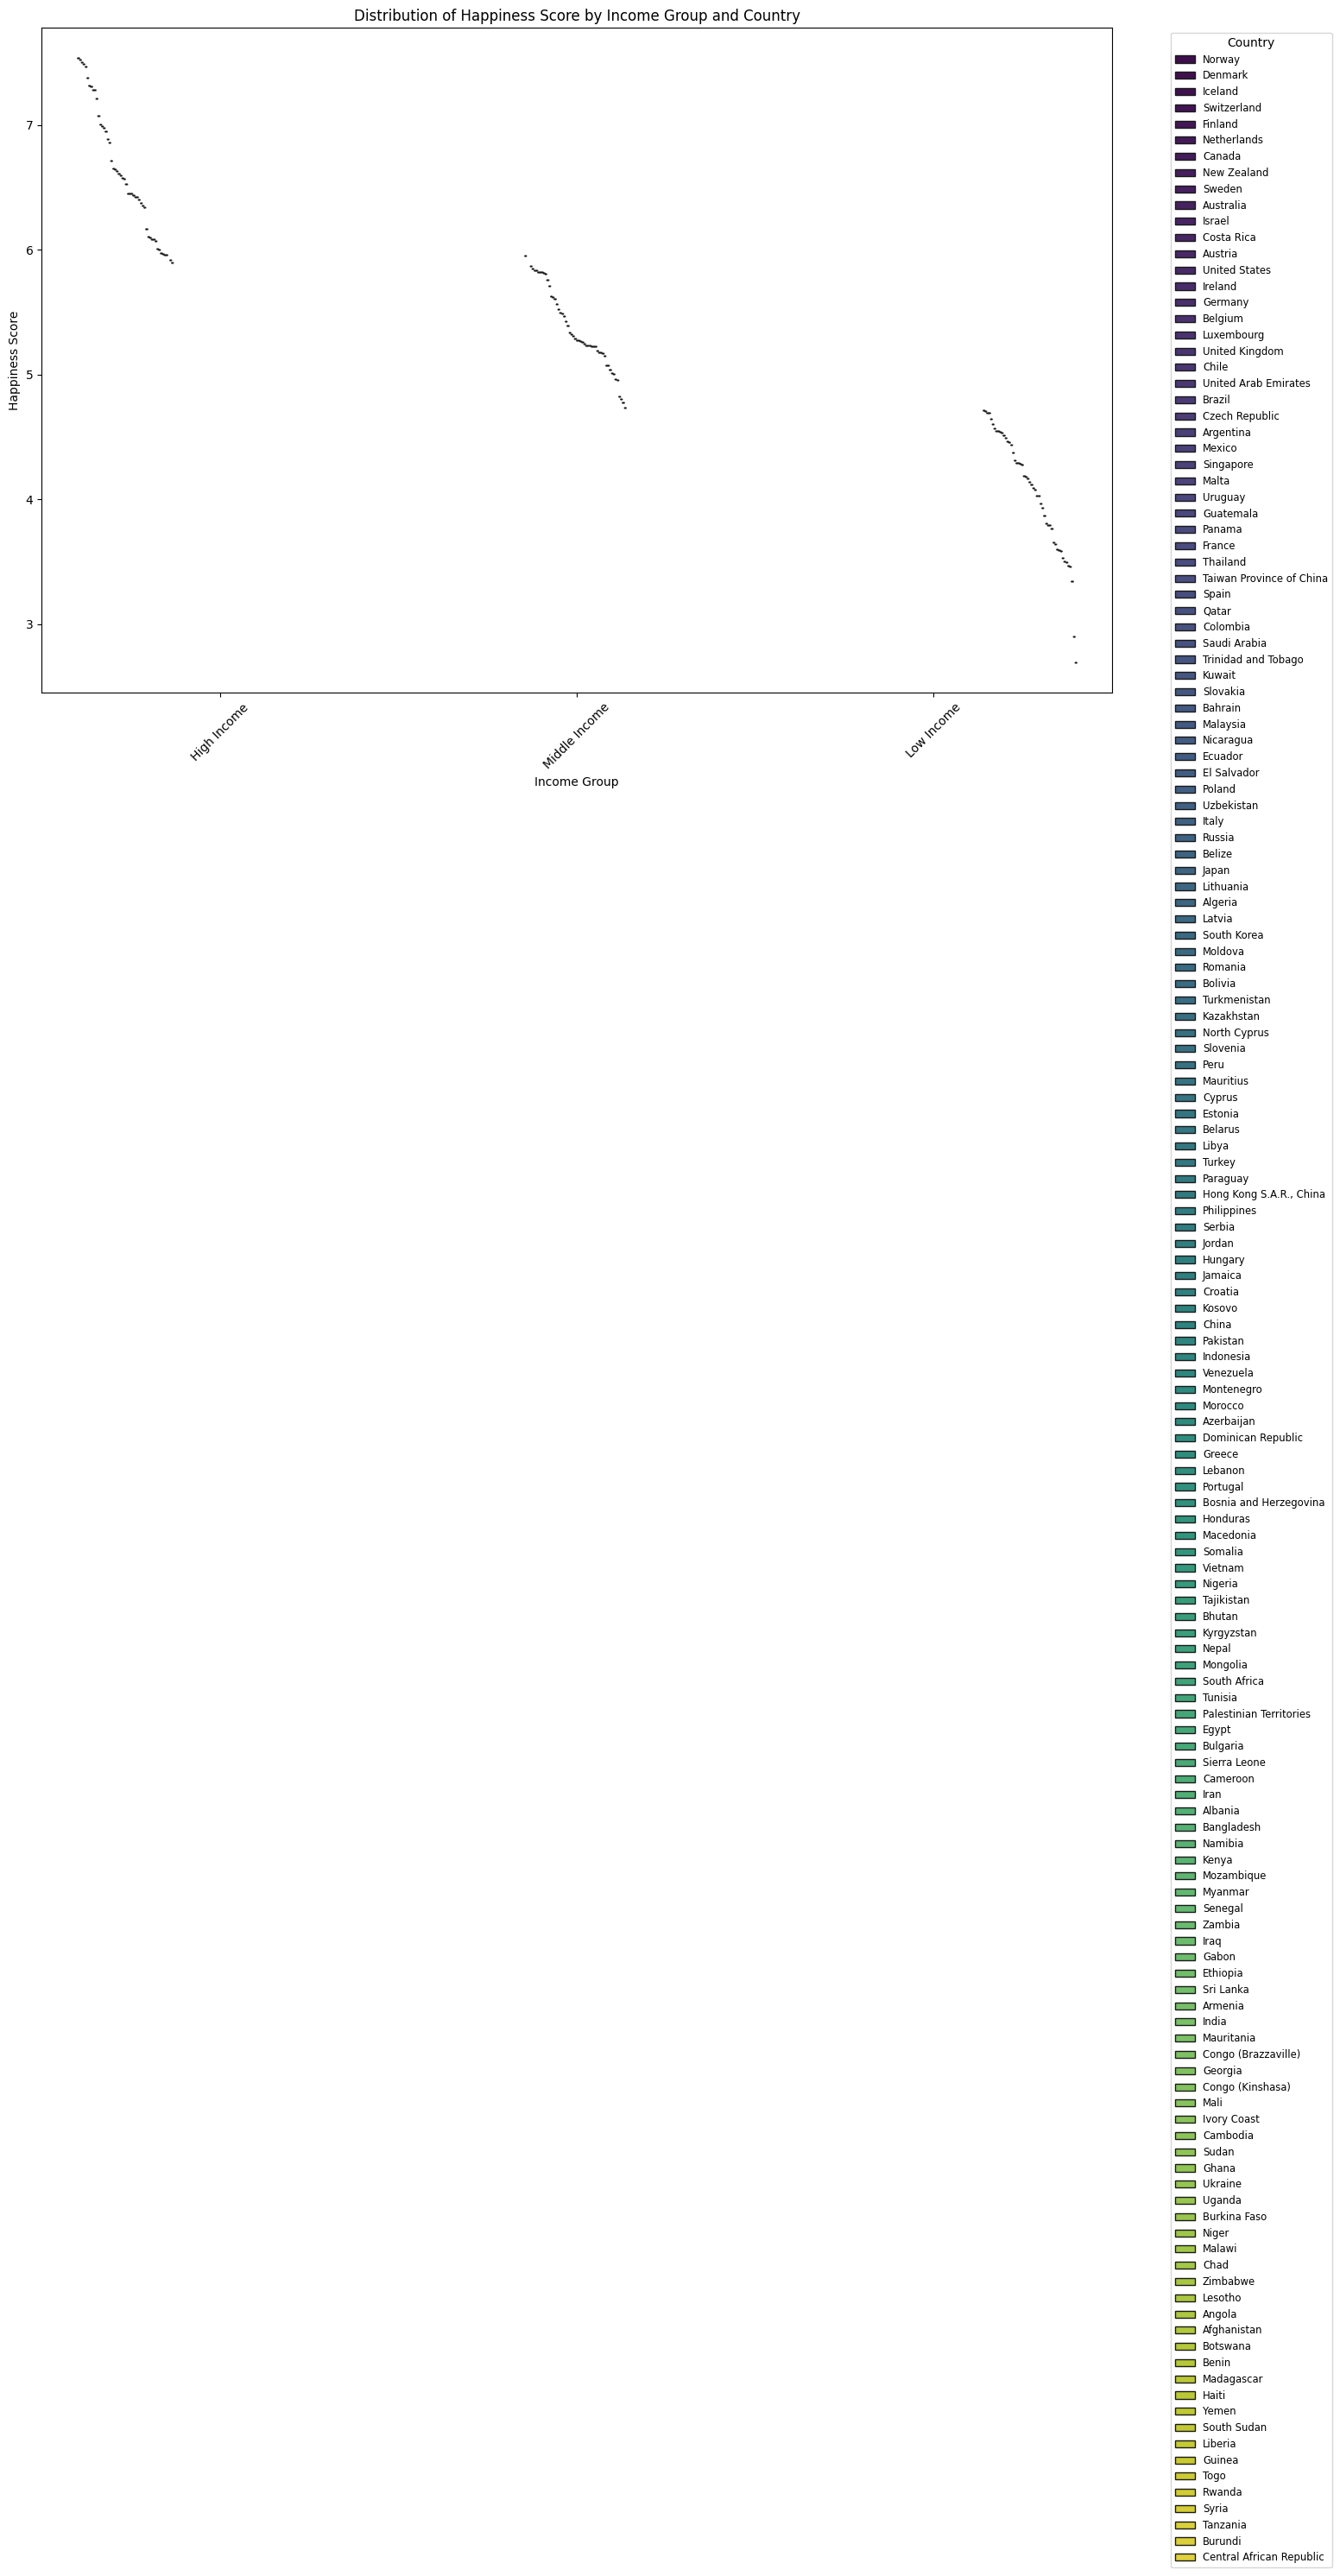

In [82]:
# Ensure 'Country' is a categorical variable if you want to keep it organized
df['Country'] = df['Country'].astype('category')

#I have incresed the size to accomodate the country names
plt.figure(figsize=(16, 10)) 
sns.boxplot(x='Income.Group', y='Happiness.Score', hue='Country', data=happy_df, palette='viridis')


plt.title('Distribution of Happiness Score by Income Group and Country')
plt.ylabel('Happiness Score')
plt.xlabel('Income Group')

# Next, I adjust title and labels for clarity
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Lastly, this is to avoid clipping
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##The countries are still coded; therefore, I will make a few changes below

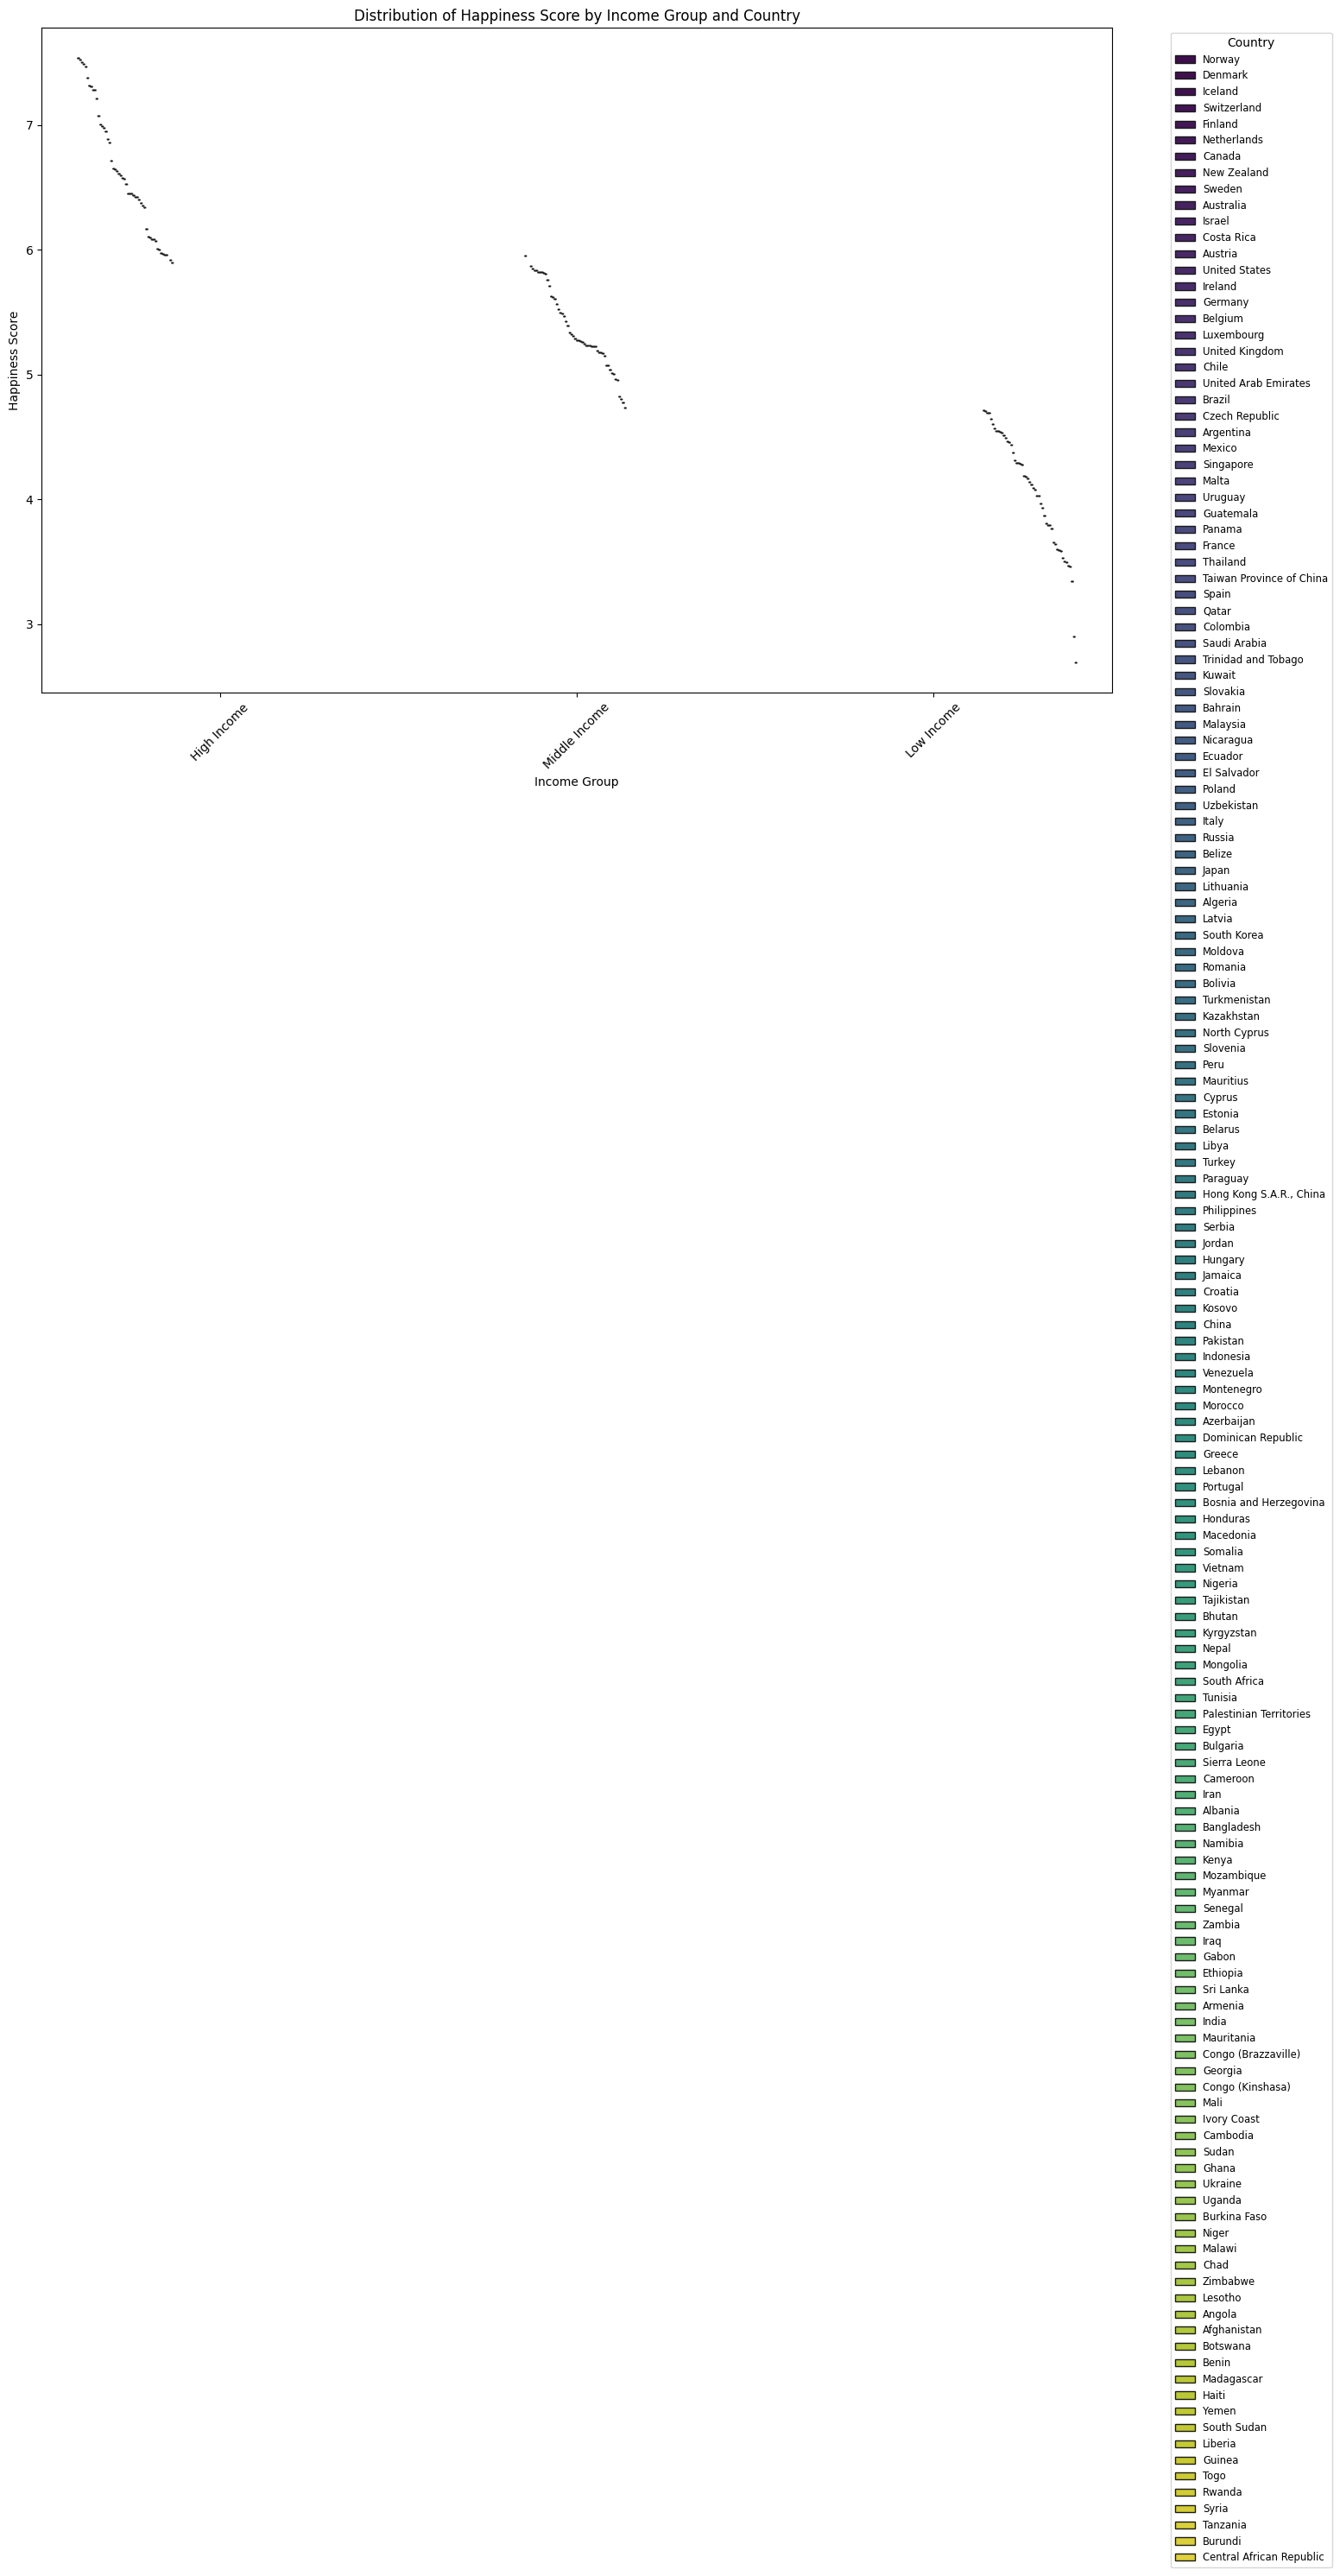

In [88]:

# First I convert 'Country' column to string type
df['Country'] = df['Country'].astype('str')

# Create the box plot
plt.figure(figsize=(16, 10))
sns.boxplot(x='Income.Group', y='Happiness.Score', hue='Country', data=happy_df, palette='viridis')

# Adjust title and labels
plt.title('Distribution of Happiness Score by Income Group and Country')
plt.ylabel('Happiness Score')
plt.xlabel('Income Group')

# Improve the legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\JanetGitonga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



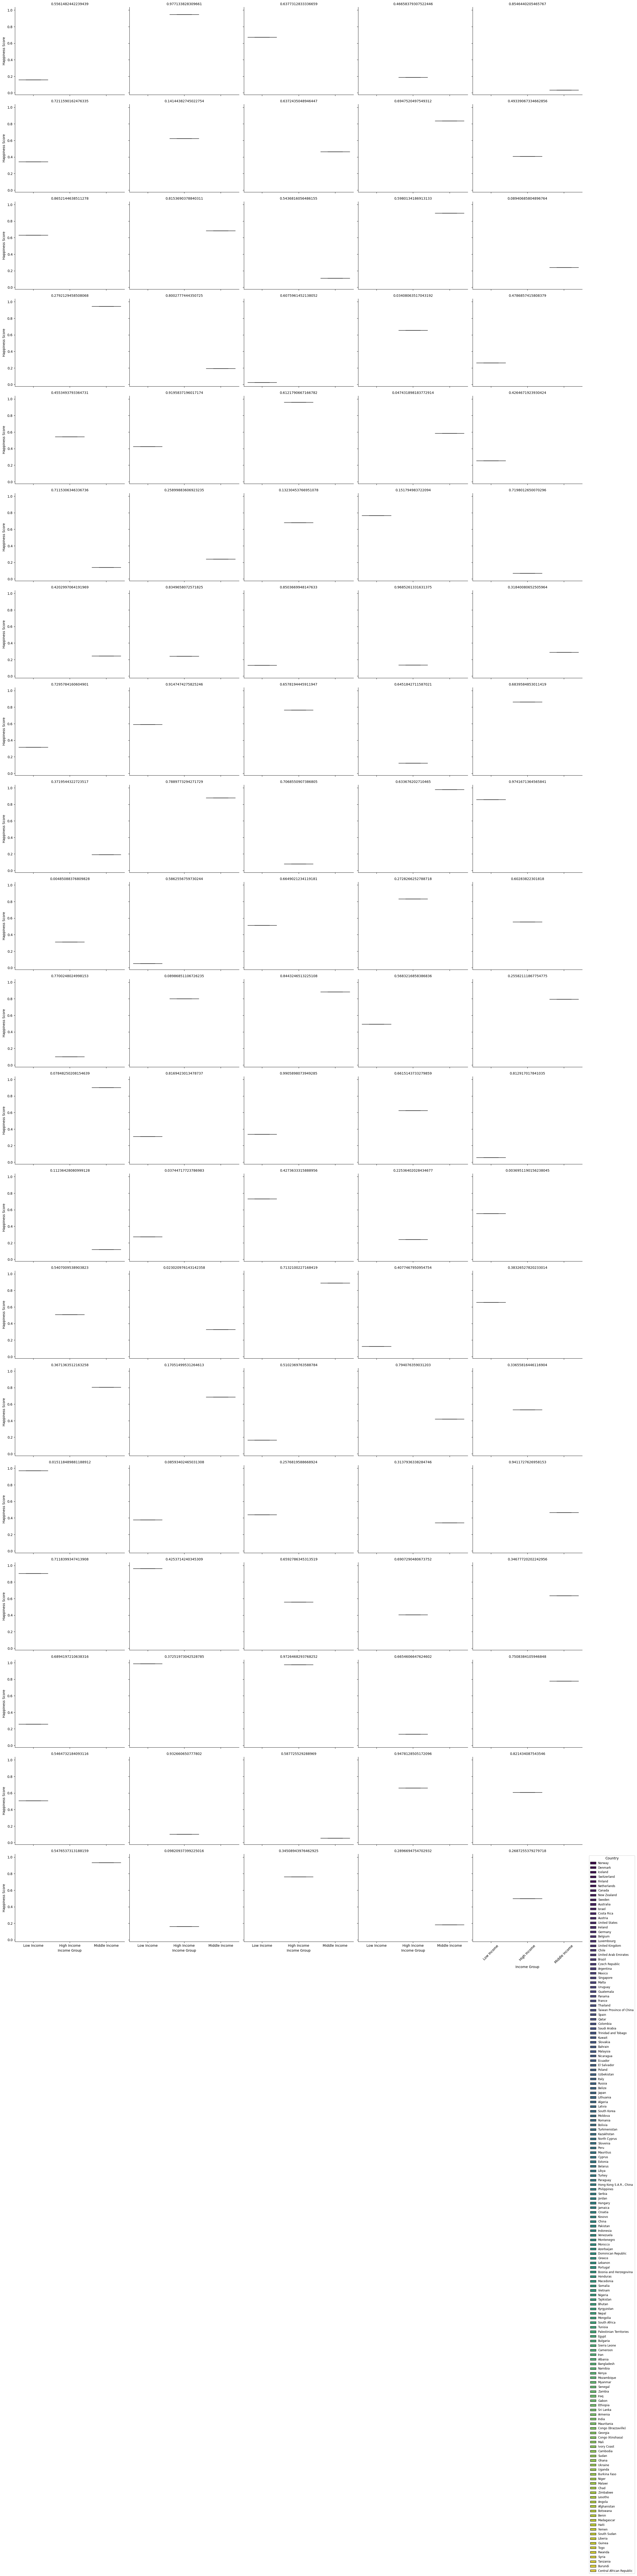

In [94]:
# I create a FacetGrid

df['Country'] = df['Country'].astype('str')

income_group_order = ['Low Income', 'Middle Income', 'High Income']

g = sns.FacetGrid(df, col='Country', col_wrap=5, height=4, aspect=1.2)
g.map(sns.boxplot, 'Income.Group', 'Happiness.Score', data=happy_df, hue='Country', palette='viridis')

g.set_titles(col_template="{col_name}")
g.set_axis_labels('Income Group', 'Happiness Score')
# Improve the legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


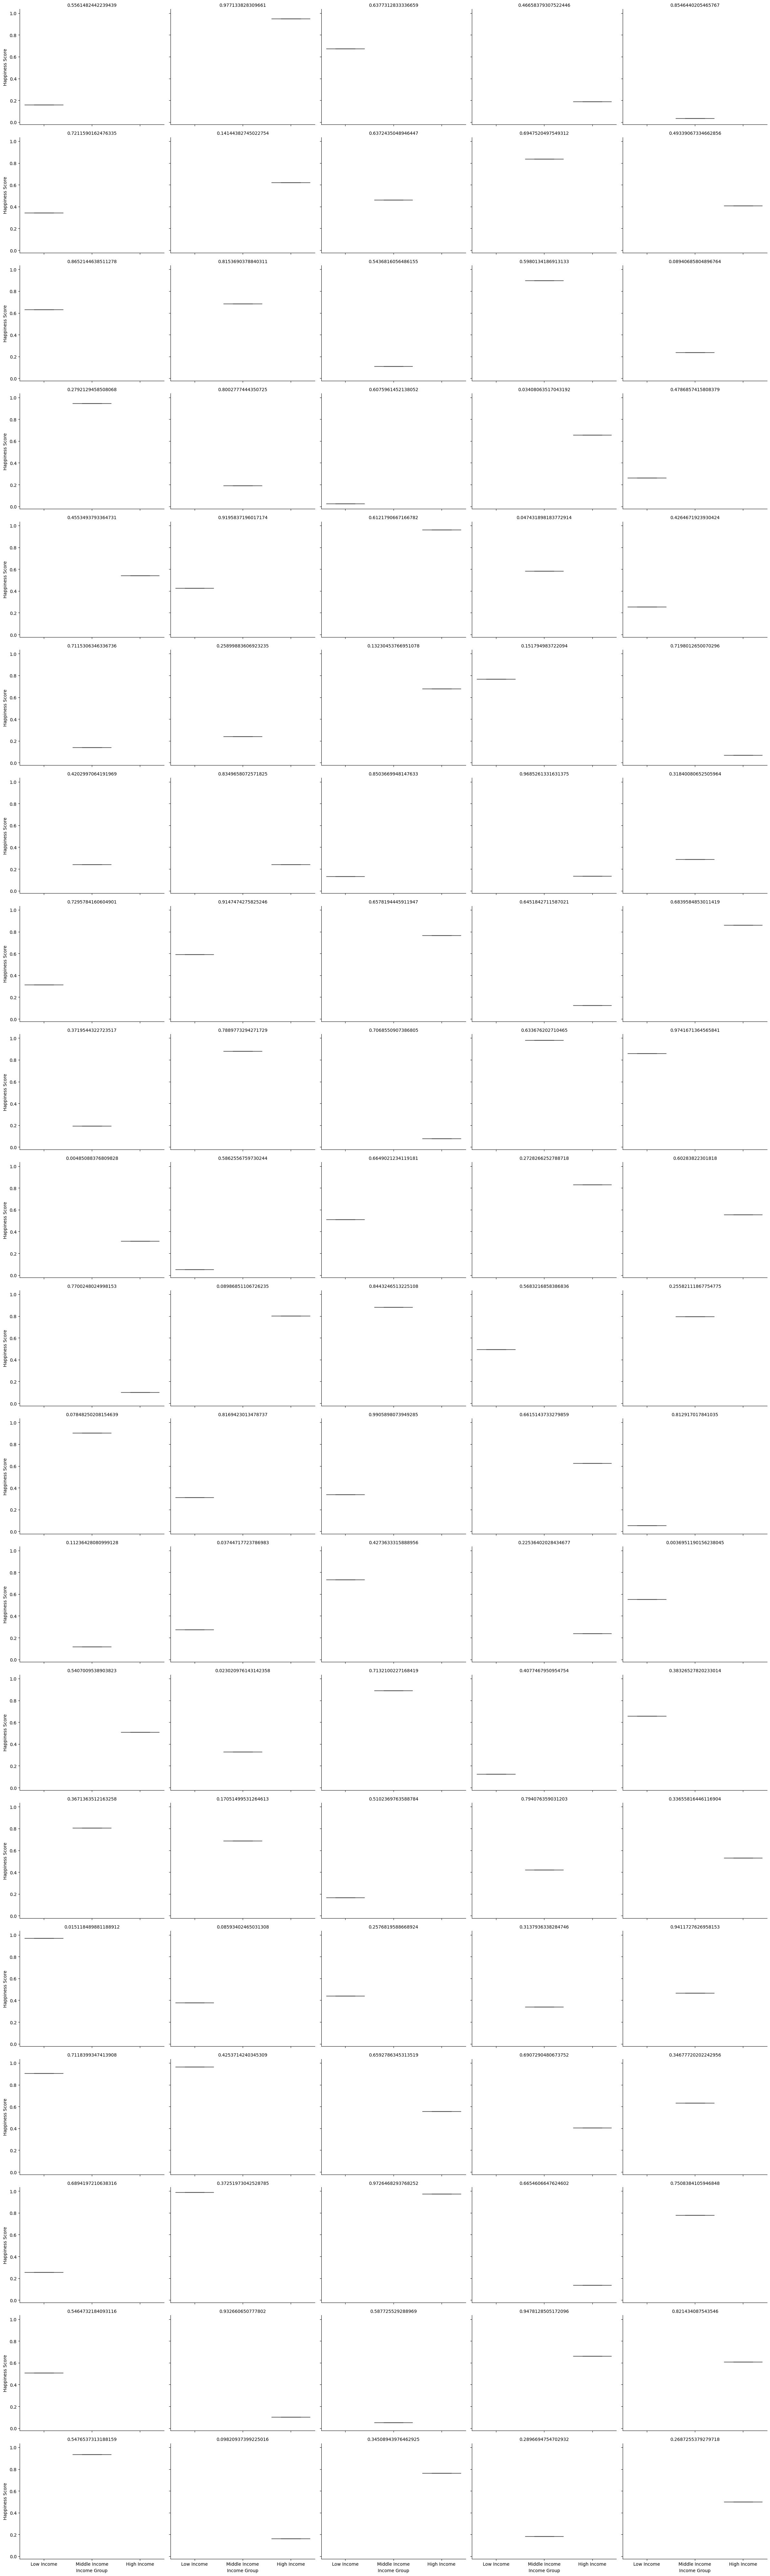

In [95]:


# Define the order of the income groups

df['Country'] = df['Country'].astype('str')

income_group_order = ['Low Income', 'Middle Income', 'High Income']

# Create a FacetGrid
g = sns.FacetGrid(df, col='Country', col_wrap=5, height=4, aspect=1.2)

# Map the boxplot onto the grid
g.map(sns.boxplot, 'Income.Group', 'Happiness.Score', data=happy_df, order=income_group_order, hue='Income.Group', palette='viridis')

# Set titles and axis labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Income Group', 'Happiness Score')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


##INSIGHTS
1. Countries with higher GDP, had higher happiness score.The same goes for countries with higher life expectancy and better health care.
2. Countries with low trust in their goverment, scored were ranked lower.
3. Countries that were ranked in the high income group scored highest on happiness and countries that were ranked in the low income group, scored lowest